In [ ]:
# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries that helps to Split the datasets into traning & test data
from sklearn.model_selection import train_test_split

# Libraries for Standardisation & Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

# Libraries for Building a Logistic Regression Model
import statsmodels.api as sm

# Libraries for RFE Used in Feature Elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for calculate Accuracy Scores & Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

# Import Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Analysis - Data Reading and Understanding

In [ ]:
# Read CSV file in the dataframe
leads_scoring_df = pd.read_csv("C:\\Users\\sugku\\Downloads\\Leads.csv")

In [ ]:
# Check shape of dataset
leads_scoring_df.shape

(9240, 37)

In [ ]:
leads_scoring_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [ ]:
# Understand the distribution of data
leads_scoring_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

# Data Cleaning & Handling duplicate values

In [ ]:
# Check the columns with count, uniques, top and freq
leads_scoring_df.describe(include = 'object')

Prospect ID              Lead Origin  \
count                                   9240                     9240   
unique                                  9240                        5   
top     7927b2df-8bba-4d29-b9a2-b6e0beafe620  Landing Page Submission   
freq                                       1                     4886   

       Lead Source Do Not Email Do Not Call Last Activity Country  \
count         9204         9240        9240          9137    6779   
unique          21            2           2            17      38   
top         Google           No          No  Email Opened   India   
freq          2868         8506        9238          3437    6492   

       Specialization How did you hear about X Education  \
count            7802                               7033   
unique             19                                 10   
top            Select                             Select   
freq             1942                               5043   

       What is your current occupation  ... Lead Quality  \
count                             6550  ...         4473   
unique                               6  ...            5   
top                         Unemployed  ...     Might be   
freq                              5600  ...         1560   

       Update me on Supply Chain Content Get updates on DM Content  \
count                               9240                      9240   
unique                                 1                         1   
top                                   No                        No   
freq                                9240                      9240   

       Lead Profile    City Asymmetrique Activity Index  \
count          6531    7820                        5022   
unique            6       7                           3   
top          Select  Mumbai                   02.Medium   
freq           4146    3222                        3839   

       Asymmetrique Profile Index I agree to pay the amount through cheque  \
count                        5022                                     9240   
unique                          3                                        1   
top                     02.Medium                                       No   
freq                         2788                                     9240   

       A free copy of Mastering The Interview Last Notable Activity  
count                                    9240                  9240  
unique                                      2                    16  
top                                        No              Modified  
freq                                     6352                  3407  

[4 rows x 30 columns]

In [ ]:
# Find out the unique values at each column
leads_scoring_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [ ]:
# "Lead Number" and "Prospect ID" are being dropped because they each have distinct values
leads_scoring_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

## Handling Columns with categorical data

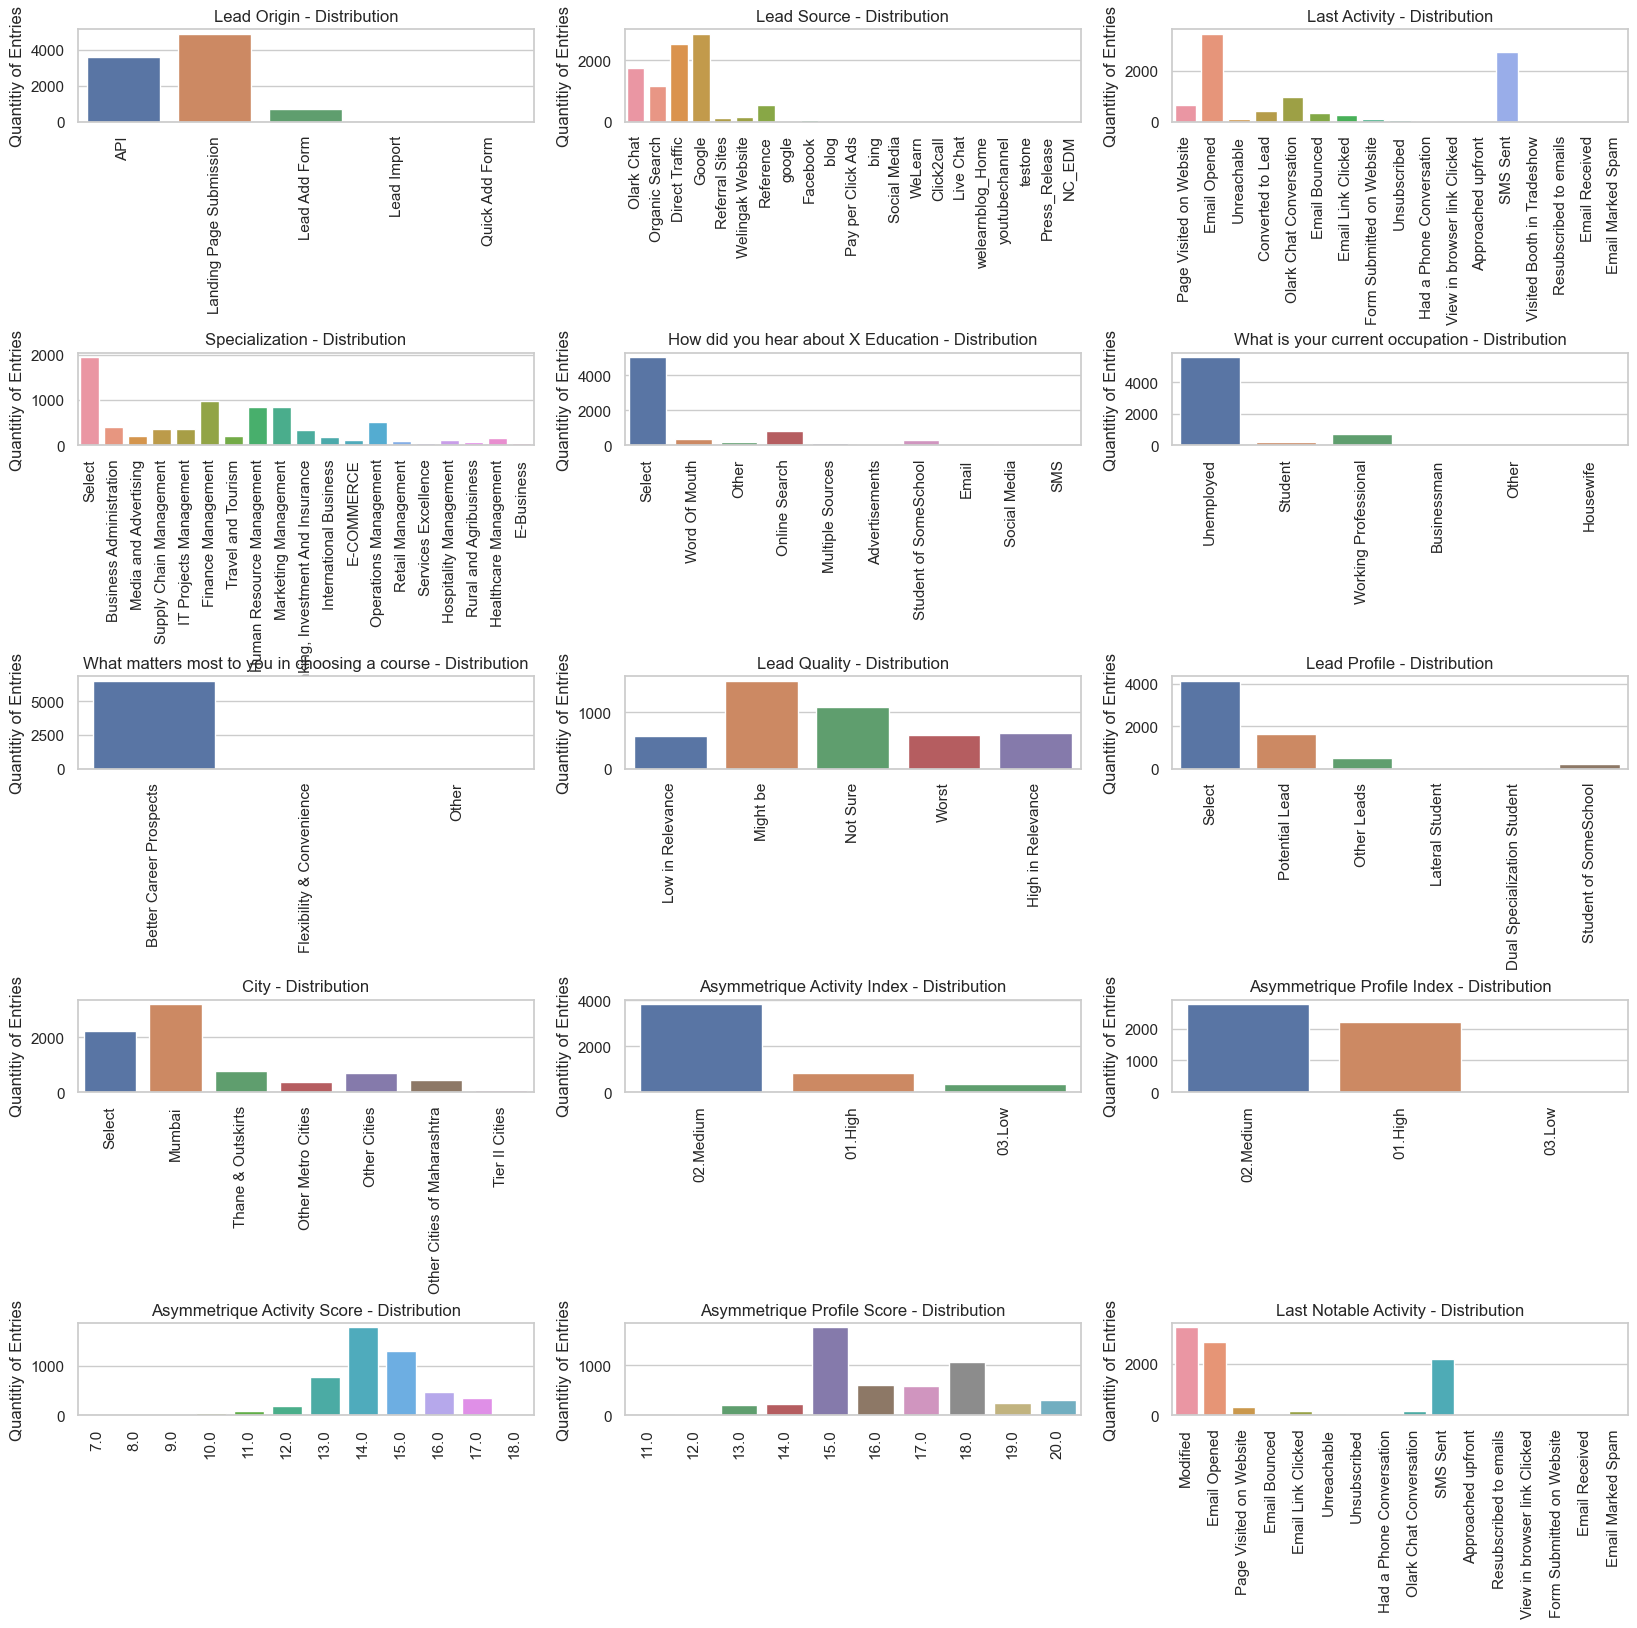

In [ ]:
# Check the distribution of Categorical variables to get an idea of how the values are spread
list_of_columns=['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
sns.set(style="whitegrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(20,18))
for i in range(len(list_of_columns)):
    plt.subplot(5, 3, i+1)
    var=list_of_columns[i]
    sns.countplot(x=var, data=leads_scoring_df)
    plt.title(var+' - Distribution')
    plt.ylabel('Quantitiy of Entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

### Some columns include a default option called "Select" which is asking the customer to select some option in it, hence we replace that with NaN (Not an Number)

In [ ]:
# Covert the value 'Select' into NaN in the column 'Specialization', 'How did you hear about X Education', 'Lead Profile', 'City'
leads_scoring_df = leads_scoring_df.replace('Select', np.nan)

In [ ]:
# Counting the number of missing values for each column (checking null values)
leads_scoring_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [ ]:
# Coverting the missing value numbers into a percentage
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [ ]:
# Remove columns with only single value which is having no added values
leads_scoring_df = leads_scoring_df.drop('Magazine', axis=1)
leads_scoring_df = leads_scoring_df.drop('Receive More Updates About Our Courses', axis=1)
leads_scoring_df = leads_scoring_df.drop('Update me on Supply Chain Content', axis=1)
leads_scoring_df = leads_scoring_df.drop('Get updates on DM Content', axis=1)
leads_scoring_df = leads_scoring_df.drop('I agree to pay the amount through cheque', axis=1)

In [ ]:
# Re-Check the shape
leads_scoring_df.shape

(9240, 30)

In [ ]:
# List out the Columns which has null values
leads_with_null_fields = round((leads_scoring_df.isna().sum())/len(leads_scoring_df.index) * 100,2)
print(leads_with_null_fields[leads_with_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City                                             39.71
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


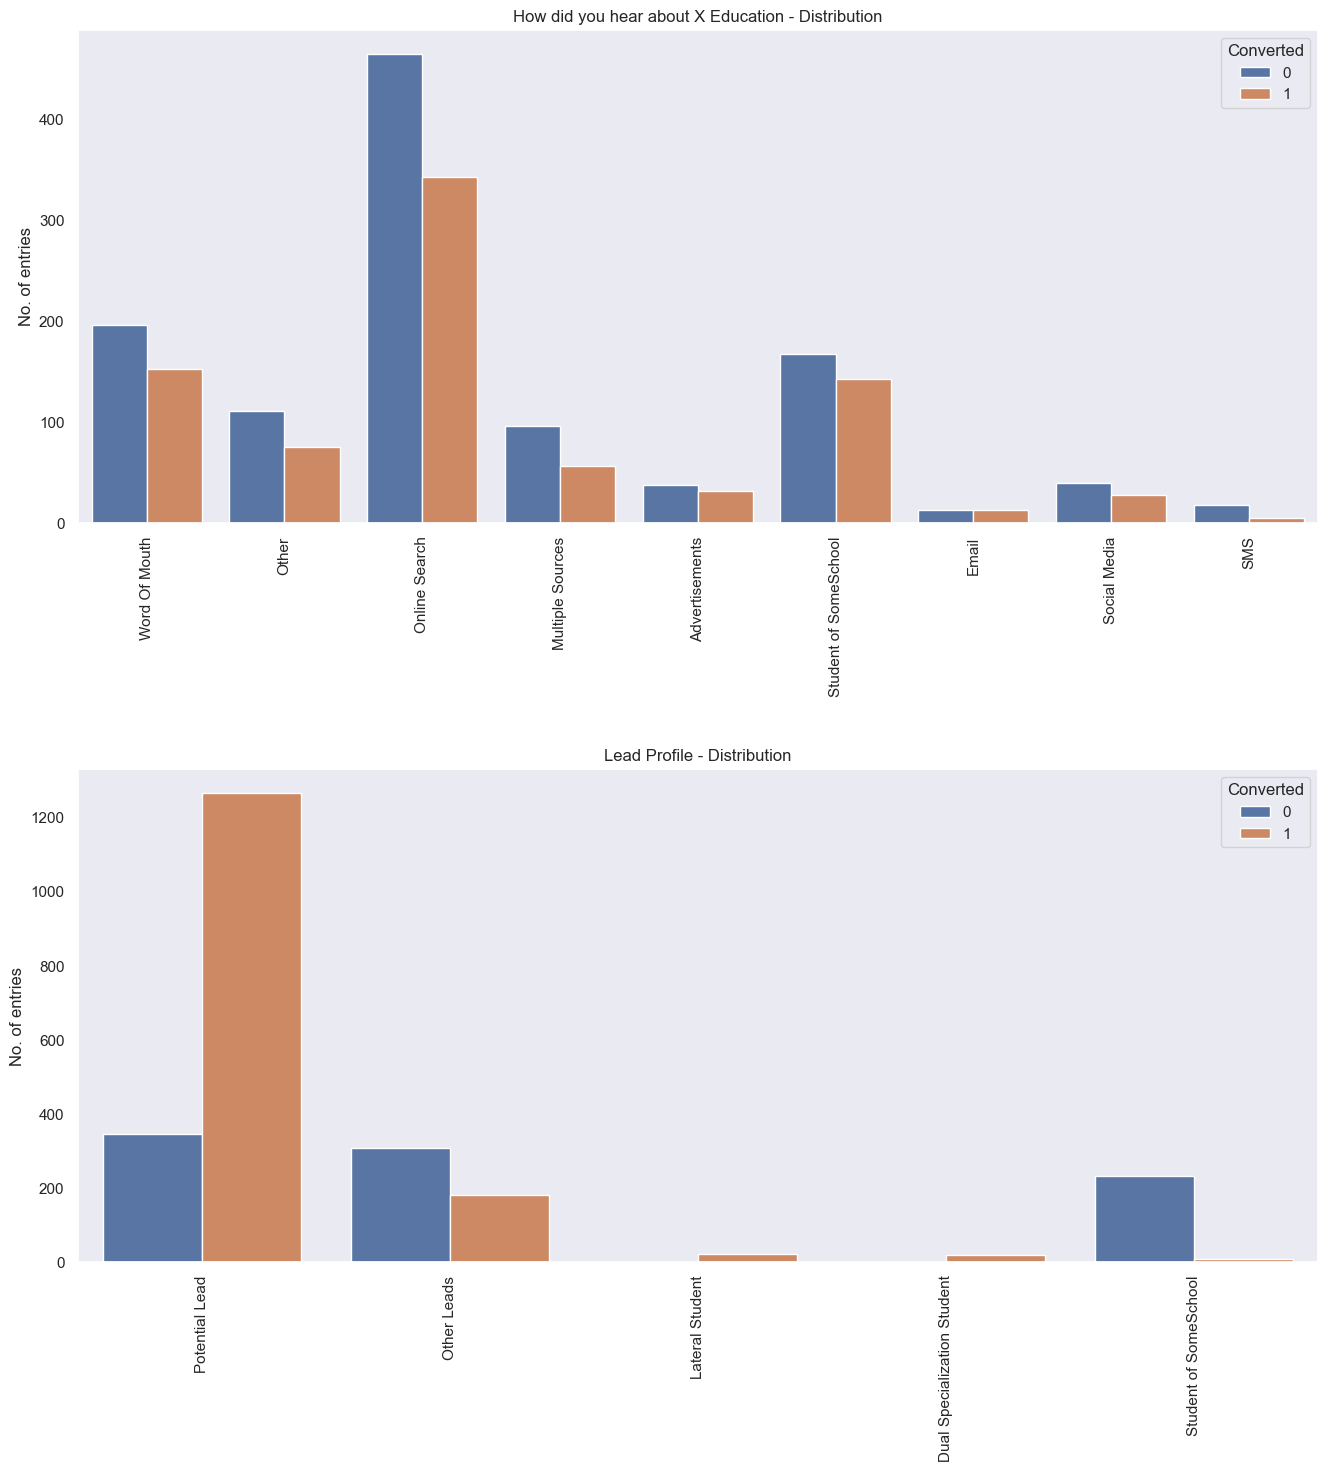

In [ ]:
# Check the variables with very high NULL values
columns_with_high_nulls = ['How did you hear about X Education','Lead Profile']
sns.set(style = "dark")

# Visualising the histogram of the distribution of these two categorical variables
plt.figure(figsize = (16,16))
for i in range(len(columns_with_high_nulls)):
    plt.subplot(2, 1, i+1)
    var = columns_with_high_nulls[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x = var, hue = 'Converted', data = leads_scoring_df)
    plt.xticks(rotation = 90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation = 90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [ ]:
# Re-checking the percentage of missing values
round(100*(leads_scoring_df.isnull().sum()/len(leads_scoring_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [ ]:
# Drop the "How did you hear about X Education" field because it contains a large percentage of NULL entries and makes little inferences
leads_scoring_df = leads_scoring_df.drop('How did you hear about X Education',axis=1)

In [ ]:
# Drop all columns with more than 45% of their values missing
cols = leads_scoring_df.columns

for i in cols:
    if((100*(leads_scoring_df[i].isnull().sum()/len(leads_scoring_df.index))) >= 45):
        leads_scoring_df.drop(i, 1, inplace = True)

In [ ]:
# Select the columns with non-numeric data type
categorical_columns = leads_scoring_df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print those columns
print(categorical_columns)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [ ]:
columnsList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in columnsList:
        perc=100*leads_scoring_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

# View Points

<strong>City:</strong> There are 39.71% missing values for City. The data would become more skewed after using Mumbai to impute missing values. Later, skewness will lead to bias in the model. So, the City column can be <strong>removed.</strong>

<strong>Tags:</strong> Tags has 36.29% of its values missing. To customers, tags are applied showing the leadlead's current status. This column will not be helpful for modelling because this is the current situation. Therefore, it may be <strong>dropped.</strong>
    
<strong>Specialisation:</strong> 36.58% of the variables in Specialisation are missing. There is equal distribution of the chosen specialisation. Imputation or dropping is therefore not a wise decision. The word "Others" must be added as a new category.

<strong>What is your present occupation:</strong> Because it has the most values, we can substitute "Unemployed" for the missing numbers. Since X Education sells online courses and jobless persons could enrol in these courses to improve their prospects of finding employment, this seems to be a crucial factor in the commercial setting.

<strong>Country:</strong> Approximately 96% of X Education's online course purchasers are Indians. At this time, it is not profitable to associate India with missing values. The "Country" column can therefore be <strong>removed.</strong>
    
<strong>What matters most to you in choosing a course:</strong> 29.32% of this variable's values are missing. Customers have chosen "better career prospects" in 99.95% of cases. This is wildly distorted and won't reveal anything, hence it can be <strong>removed.</strong>

<strong>Lead Source:</strong> Because "Google" has the most occurrences and there are only 0.39% total nulls in this column, we will label the missing values with "Google."
    
<strong>Last Activity:</strong> Due to the fact that "Email Opened" has the maximum number of values and that this column has an overall missing value rate of just 1.11%, we will impute the missing values with the label "Email Opened."

In [ ]:
# Removing the columns in light of the aforementioned perspective points
print("Before Drop", leads_scoring_df.shape)
leads_scoring_df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
# Comparing the shape before and after removing these above columns
print("After Drop", leads_scoring_df.shape)

Before Drop (9240, 23)
After Drop (9240, 19)


In [ ]:
# Imputing values based on the aforementioned findings/observations
missing_values = {'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
leads_scoring_df = leads_scoring_df.fillna(value=missing_values)

## Handling Columns with Numerical data

In [ ]:
# Analyze the values in TotalVisits
leads_scoring_df.TotalVisits.value_counts().head(15)

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
Name: TotalVisits, dtype: int64

In [ ]:
# Replace the missing values of TotalVisits imputed with mode
leads_scoring_df['TotalVisits'].fillna(leads_scoring_df['TotalVisits'].mode()[0], inplace=True)
# Re-checking after imputing the missing values
leads_scoring_df.TotalVisits.value_counts().head(15)

0.0     2326
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
13.0      48
12.0      45
14.0      36
Name: TotalVisits, dtype: int64

In [ ]:
# Similarly impute the missing values of Page Views Per Visit using mode
leads_scoring_df['Page Views Per Visit'].fillna(leads_scoring_df['Page Views Per Visit'].mode()[0], inplace=True)

In [ ]:
# After handling categorical and numerical columns, rechecking the percentage of null values
round(((leads_scoring_df.isnull().sum()/leads_scoring_df.shape[0])*100),2).sort_values(ascending=False)

Lead Origin                               0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Through Recommendations                   0.0
Digital Advertisement                     0.0
Newspaper                                 0.0
X Education Forums                        0.0
Newspaper Article                         0.0
Search                                    0.0
Specialization                            0.0
Lead Source                               0.0
Last Activity                             0.0
Page Views Per Visit                      0.0
Total Time Spent on Website               0.0
TotalVisits                               0.0
Converted                                 0.0
Do Not Call                               0.0
Do Not Email                              0.0
Last Notable Activity                     0.0
dtype: float64

## Deleting further columns that are not required for this study

<strong>Last Notable Activity:</strong> There is no benefit to the model from this column. By deleting this column, additional information will be cleared from the data frame.

In [ ]:
# Dropping 'Last Notable Activity' Columns
leads_scoring_df.drop(['Last Notable Activity'], axis=1, inplace=True)

In [ ]:
# Re-checking the shape of the dataframe
print("After Dropping Columns", leads_scoring_df.shape)

After Dropping Columns (9240, 18)


# Analyzing Categorical Columns

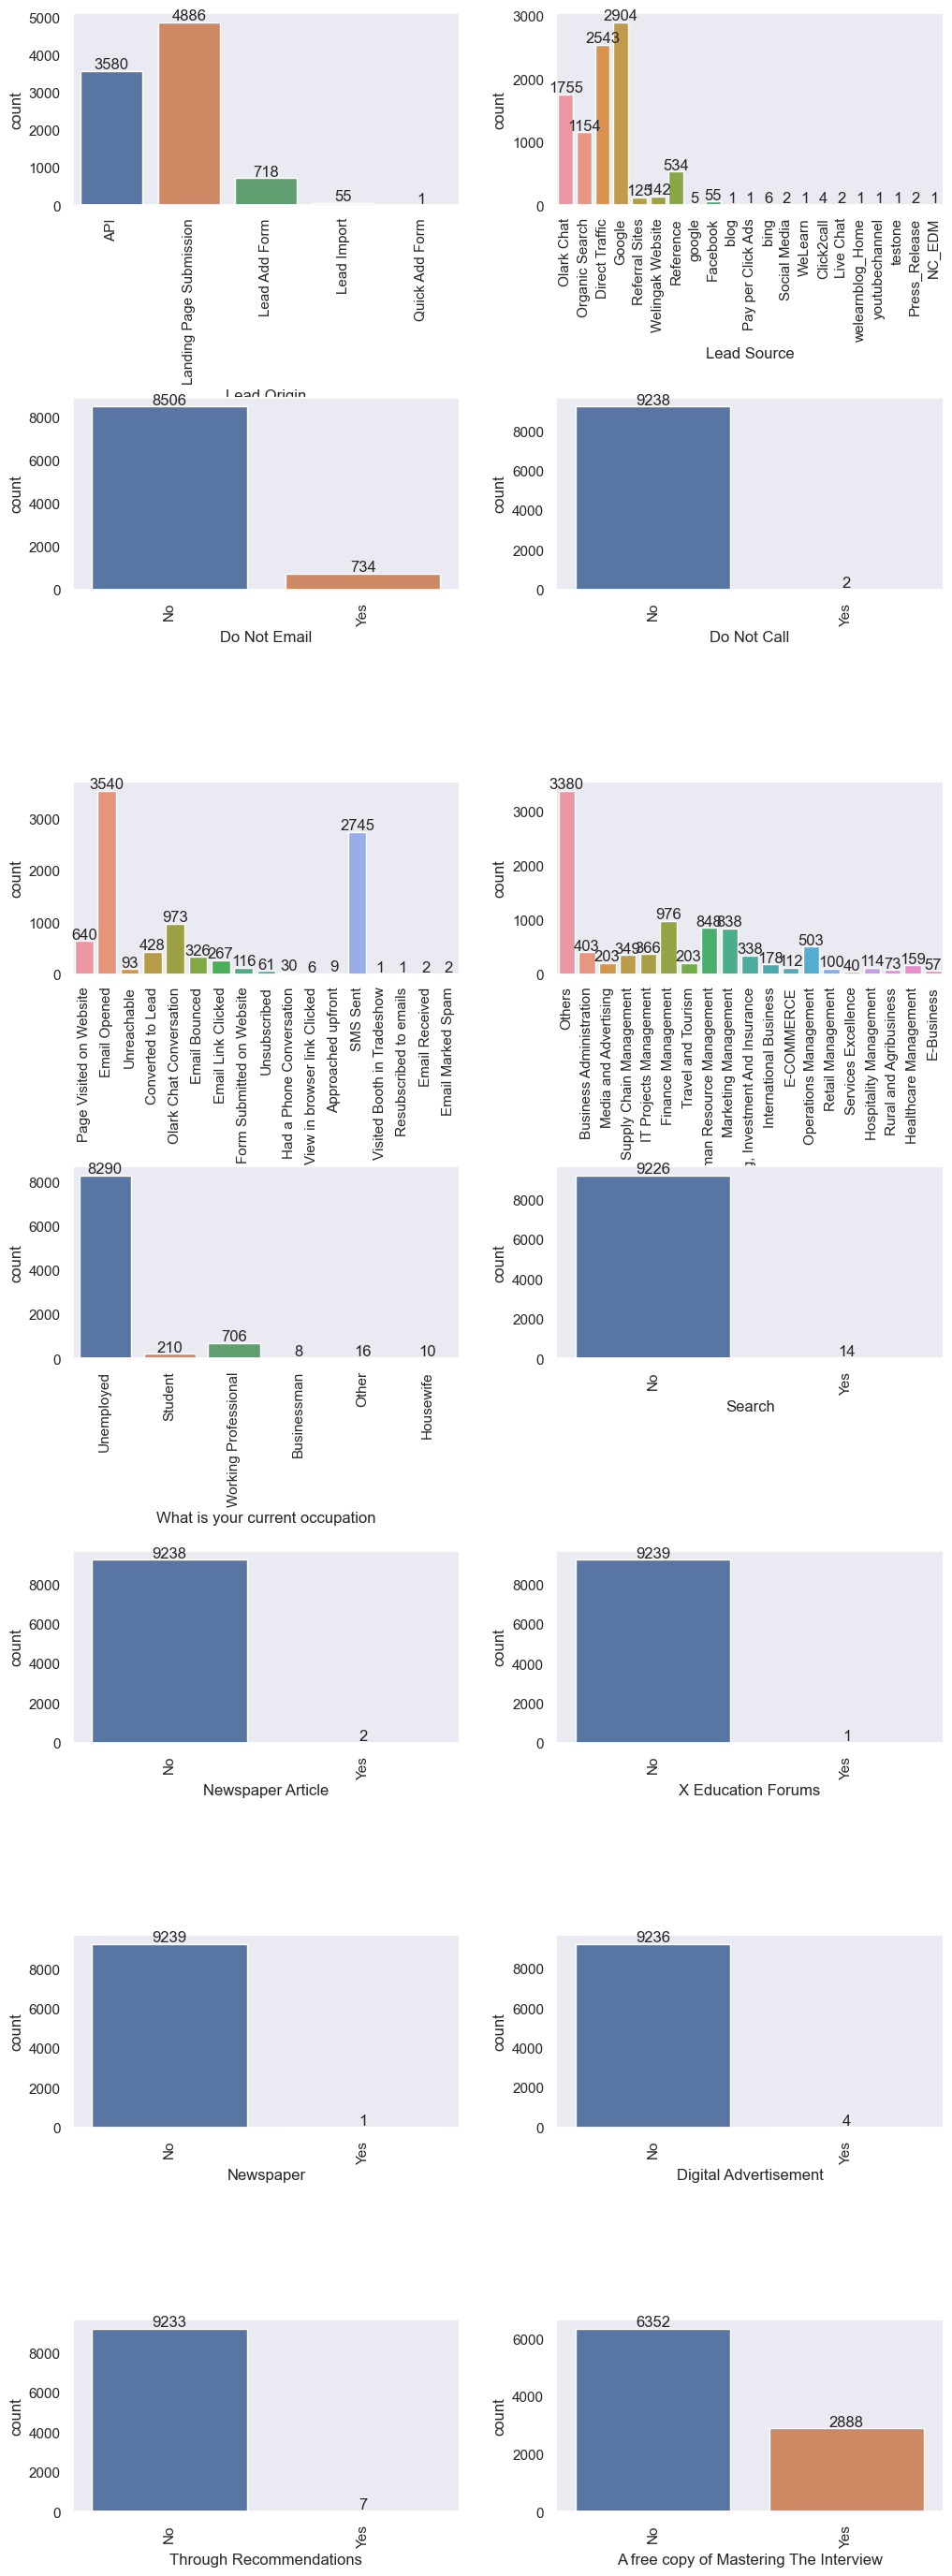

In [ ]:
# plotting countplot for object dtype and histogram for number to get data distribution
categorical_columns = leads_scoring_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize = (12,40))

plt.subplots_adjust(wspace = 0.25, hspace = 1)
for i in enumerate(categorical_columns):
    plt.subplot(8,2, i[0] + 1)
    ax=sns.countplot(x = i[1], data = leads_scoring_df)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

#
In the above visualization we got to know that some columns which contains highly skewed data includes 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums',
'Newspaper', 'Digital Advertisement', 'Through Recommendations'.

<strong>As a result,</strong> these columns will be removed because the model will not benefit from their inclusion.

In [ ]:
# Removing columns with high skewed data
leads_scoring_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
leads_scoring_df.shape

(9240, 11)

In [ ]:
leads_scoring_df.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                   Others   
1             Email Opened                   Others   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead                   Others   

  What is your current occupation A free copy of Mastering The Interview  
0                      Unemployed                                     No  
1                      Unemployed                                     No  
2                         Student                                    Yes  
3                      Unemployed                                     No  
4                      Unemployed                                     No

## Detection of Outliers

In [ ]:
# Analyzing Numerical Columns
def Outliers_Check(data,columnList):
    plt.figure(figsize = [20,10])
    plt.subplots_adjust(wspace = 0.5, hspace = 0.8)
    for i,j in enumerate(columnList):
        plt.subplot(2, 2, i+1)
        sns.boxplot(y=data[j])
        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j, fontsize=16, color='blue')

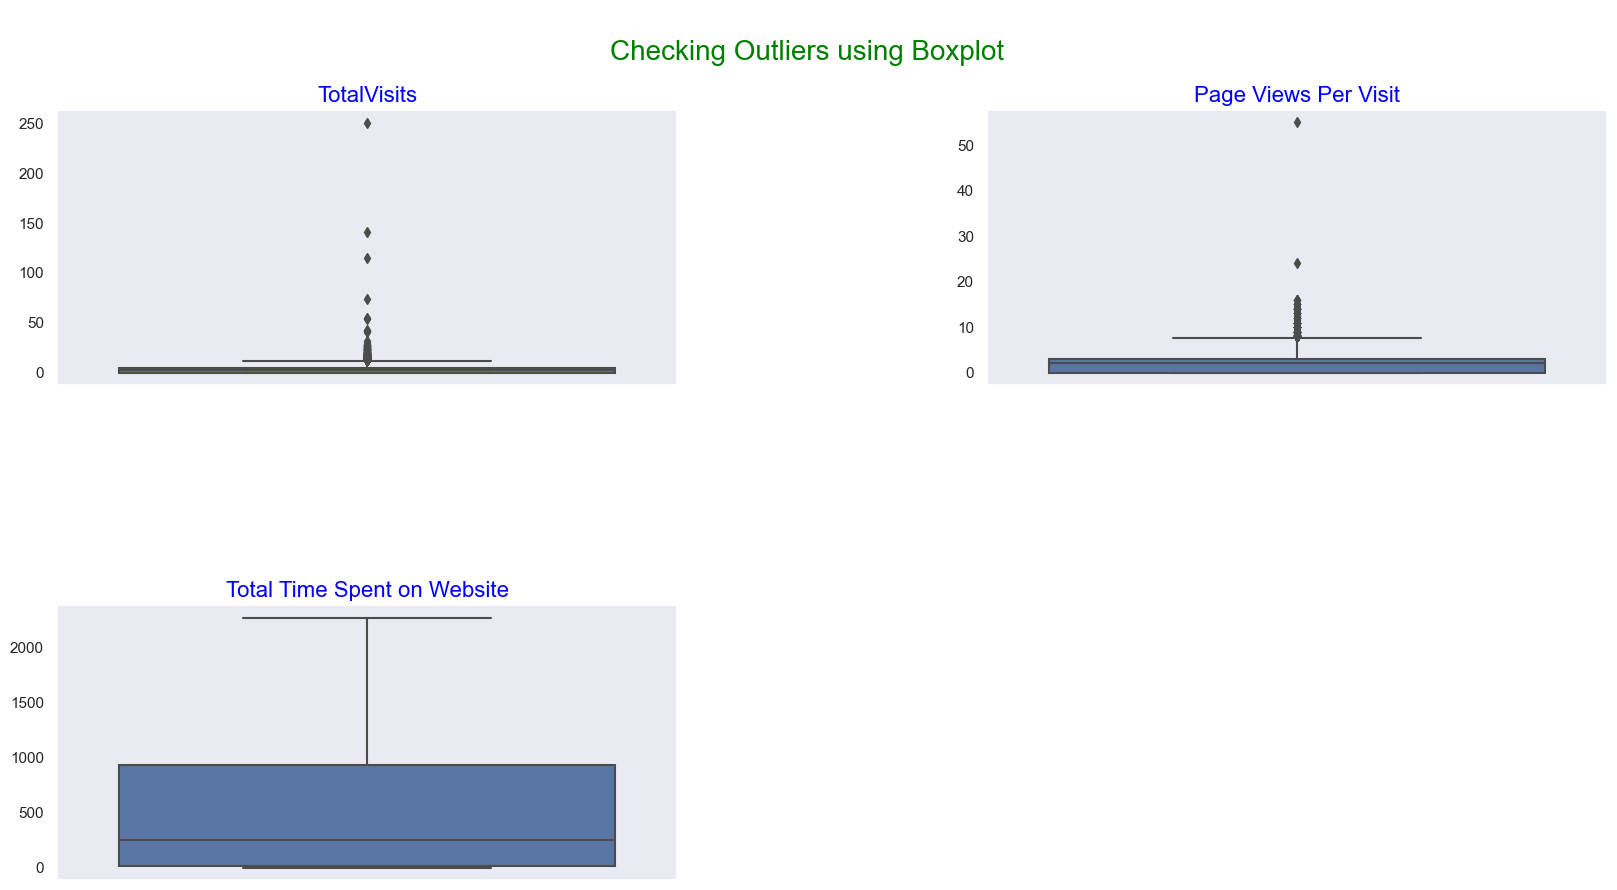

In [ ]:
# for outliers in numerical variables other than the target variable
numerical_columns = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]
# UDF
Outliers_Check(leads_scoring_df, numerical_columns)

##### "TotalVisits" and "Page Views Per Visit"Outliers may be detected in both of these variables in the boxplot. Consequently, these outliers must be handled for these variables.

### Treating Outliers

In [ ]:
# Defining UDF to treat outliers via capping and flooring

def treat_outliers(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])
        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [ ]:
# For Categorical Variables

Categorical_variables = ["Lead Origin","Lead Source","Specialization","What is your current occupation","A free copy of Mastering The Interview",
                         "Do Not Email","Last Activity"]
for i in Categorical_variables:
        perc = 100*leads_scoring_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc, "\n")
        print("___"*40, "\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

In [ ]:
# Analyzing value counts for 'Lead Source' (before replacement to 'Others')
leads_scoring_df["Lead Source"].value_counts(normalize=True)*100

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [ ]:
# Grouping of less quantity values to 'Others' - To avoid creating a lot of extra columns when creating dummy variables
leads_scoring_df['Lead Source'] = leads_scoring_df['Lead Source'].replace(["bing","Click2call","Press_Release","Social Media","Live Chat","youtubechannel","testone","Pay per Click Ads","welearnblog_Home",
                          "WeLearn","blog","NC_EDM"],"Others")

# % of value_counts after replacement
leads_scoring_df["Lead Source"].value_counts(normalize=True)*100

Google              31.428571
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
google               0.054113
Name: Lead Source, dtype: float64

In [ ]:
# Analyzing value counts for 'Lead Source' (before replacement to 'Others')
leads_scoring_df["Last Activity"].value_counts(normalize=True)*100

Email Opened                    38.311688
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [ ]:
# Grouping low frequency value levels to Others
leads_scoring_df['Last Activity'] = leads_scoring_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation',
                                    'Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received',
                                    'Visited Booth in Tradeshow','Resubscribed to emails'],'Others')
# % of value_counts after replacement
leads_scoring_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [ ]:
# Changing the name of the column from "A free copy of Mastering The Interview" to "Free_copy"
leads_scoring_df.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Changing the column name from "What is your current occupation" to "Current_occupation"
leads_scoring_df.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

In [ ]:
# Converting the binary categorical columns into 0 and 1 (Yes/No to 1/0) using Map
leads_scoring_df['Do Not Email'] = leads_scoring_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leads_scoring_df['Free_copy'] = leads_scoring_df['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [ ]:
# Examining the data types for each variable
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


# Analyze the Data

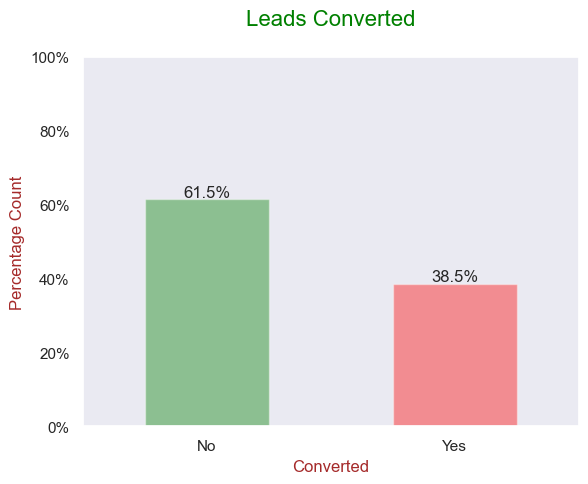

In [ ]:
# Using a bar plot to visualise the data and determine if a previous lead was converted or not, where 1 indicates that the lead was converted and 0 indicates that it wasn't
ax=(100*leads_scoring_df["Converted"].value_counts(normalize = True)).plot.bar(color = ["Green","Red"],alpha = 0.4)
plt.title("Leads Converted\n", fontdict = {'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})
plt.xlabel('Converted', fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict = {'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
ticks = np.arange(0,101,20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks,labels)
plt.xticks([0,1], ["No","Yes"])
plt.xticks(rotation = 0)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
            ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

Only <strong>38.5%</strong> of people have converted to leads - (Minority)

Wherein <strong>61.5%</strong> of the visitors didn't become leads. (Majority)

In [ ]:
# Find the proportion of Data Imbalance
ratio=(leads_scoring_df["Converted"].value_counts(normalize=True).loc[0])/(leads_scoring_df["Converted"].value_counts(normalize=True).loc[1])
print("Proportion of Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Proportion of Imbalance Ratio : 1.59 : 1


## Univariate Analysis

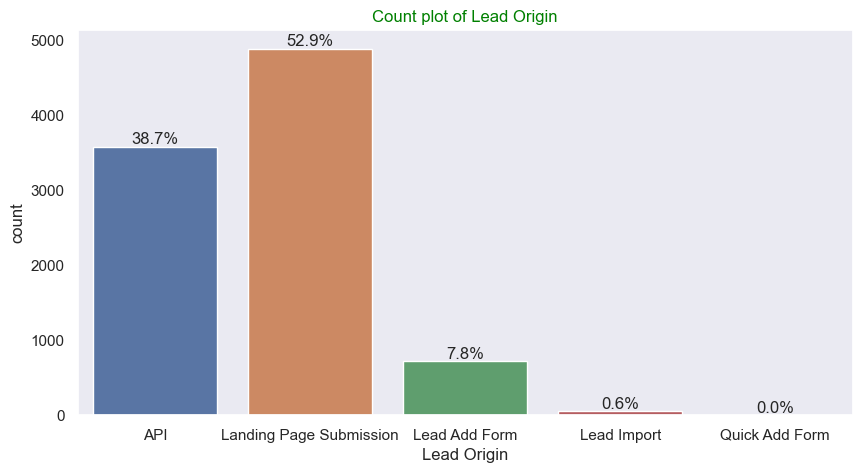

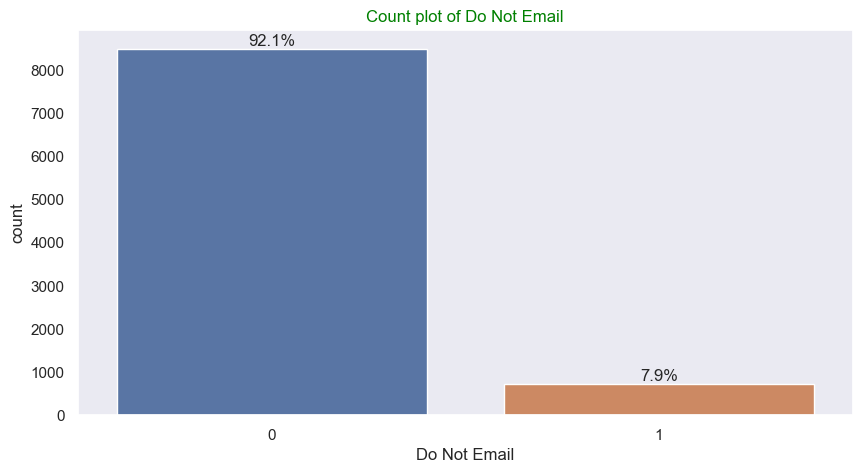

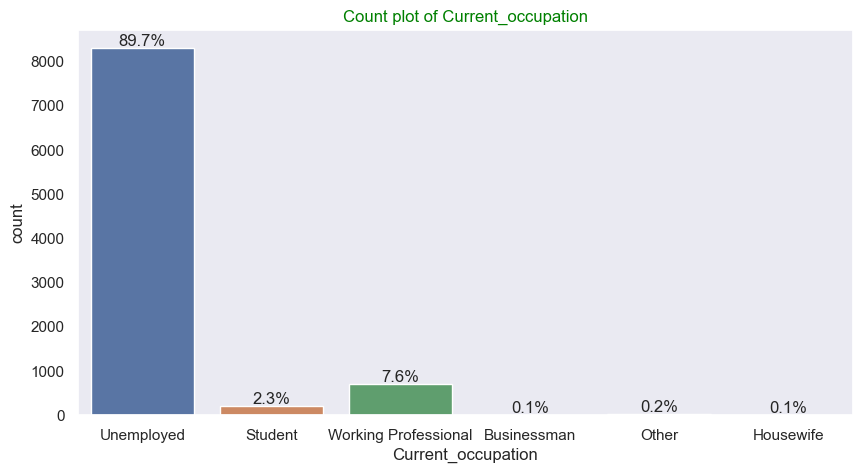

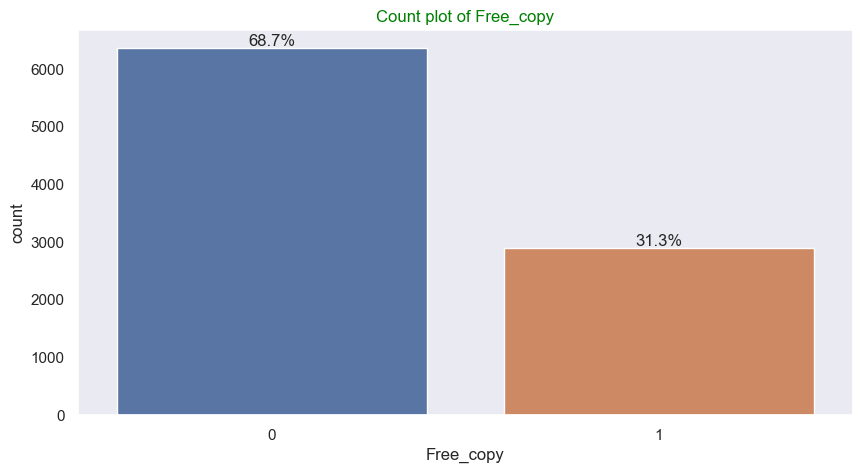

In [ ]:
# List of Categorical Columns having one variable
categorical_columns_1v = ["Lead Origin","Do Not Email","Current_occupation","Free_copy","Lead Source","Last Activity","Specialization"]

# countplot their values with counts percentage as an annotation
for i in categorical_columns_1v[:4]: # last two columns are overfitted while plotting, hence restricted it to first 5 columns
    plt.figure(figsize = [10,5])
    plt.title("Count plot of {}".format(i),color = "green")
    ax = sns.countplot(x = i,data = leads_scoring_df)
    total = len(leads_scoring_df[i])
    plt.xticks(rotation = 0)
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

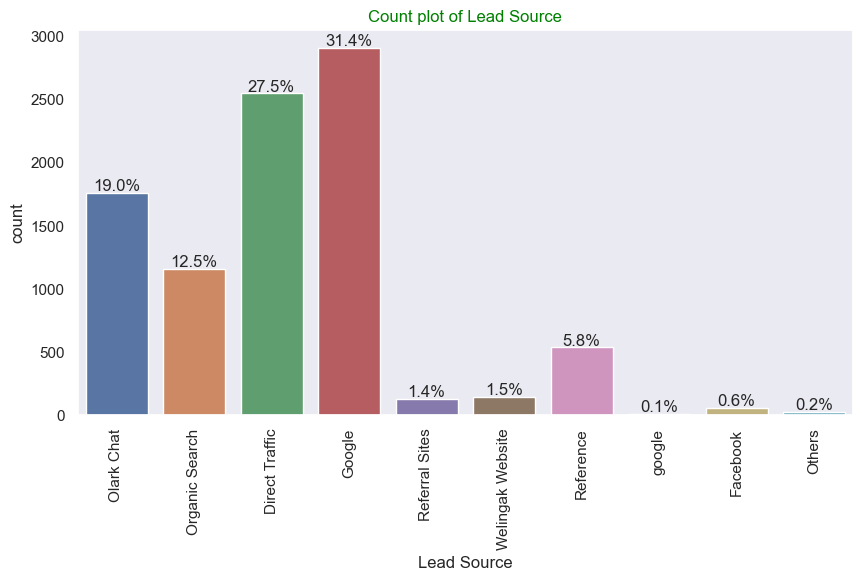

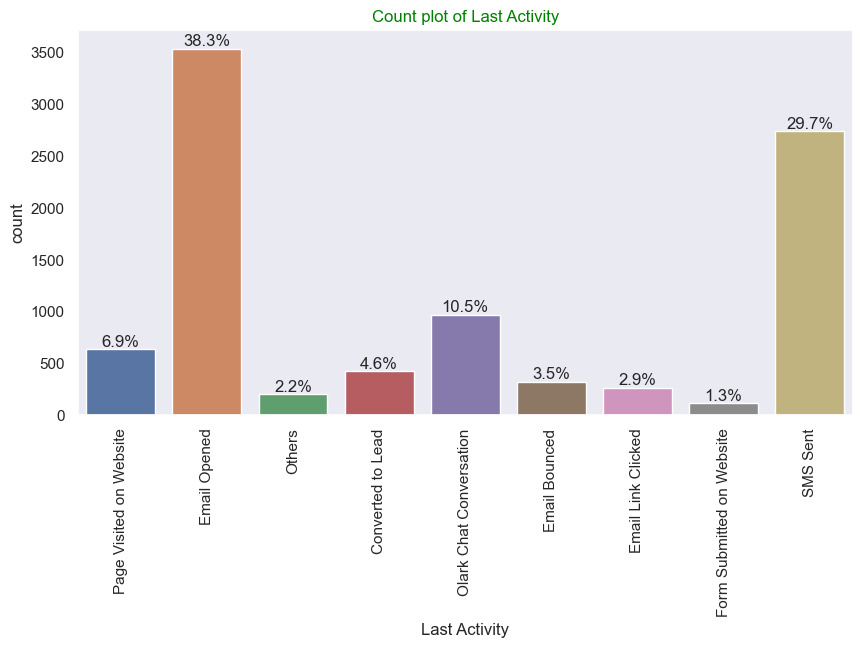

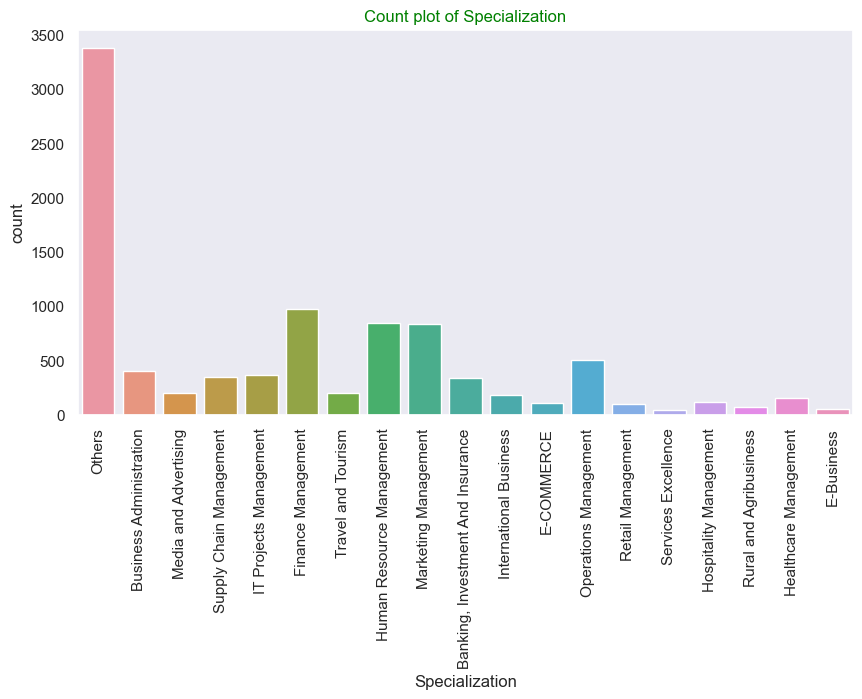

In [ ]:
# Barplot for the remaining categorical_columns_1v columns (last 2 columns)
# To prevent overfitted labelling, separated the xticks and rotated them 90 degrees.
for i in categorical_columns_1v[4:]:
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leads_scoring_df)
    total=len(leads_scoring_df[i])
    plt.xticks(rotation=90)
    if i!="Specialization":        # not attempting to specialise Xtick labels, it will become disorganised/overfitted
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()
            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        else:
            pass

## <strong>Observations:</strong>

In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

## <strong>Univariate insights:</strong>
    
This list of features from variables that are predominant (both converted and not converted) is presented.

Lead Origin: Customers were identified by "Landing Page Submission" in 52.9% of cases and by "API" in 38.7%.

Current_occupation: Its consumers make up 89.7% of the unemployed population.

Do Not Email: 92.1% of the population has chosen not to receive emails regarding the course.

Lead Source: Direct traffic and Google together account for 58.9% of the lead source.

Last activity: 68% of customers participated in the last activity, which was SMS sent and email opened.

## Bivariate Analysis

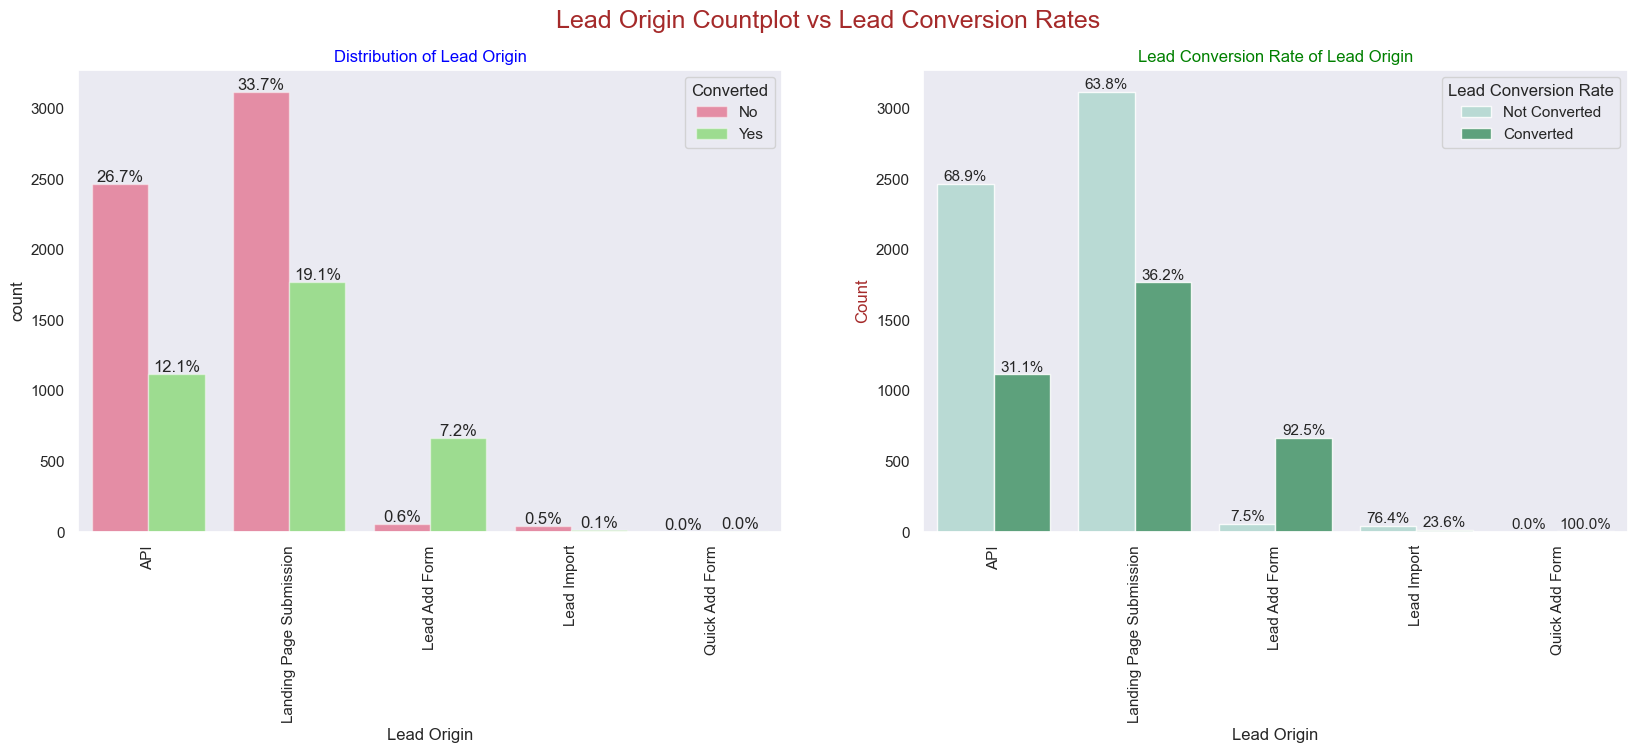

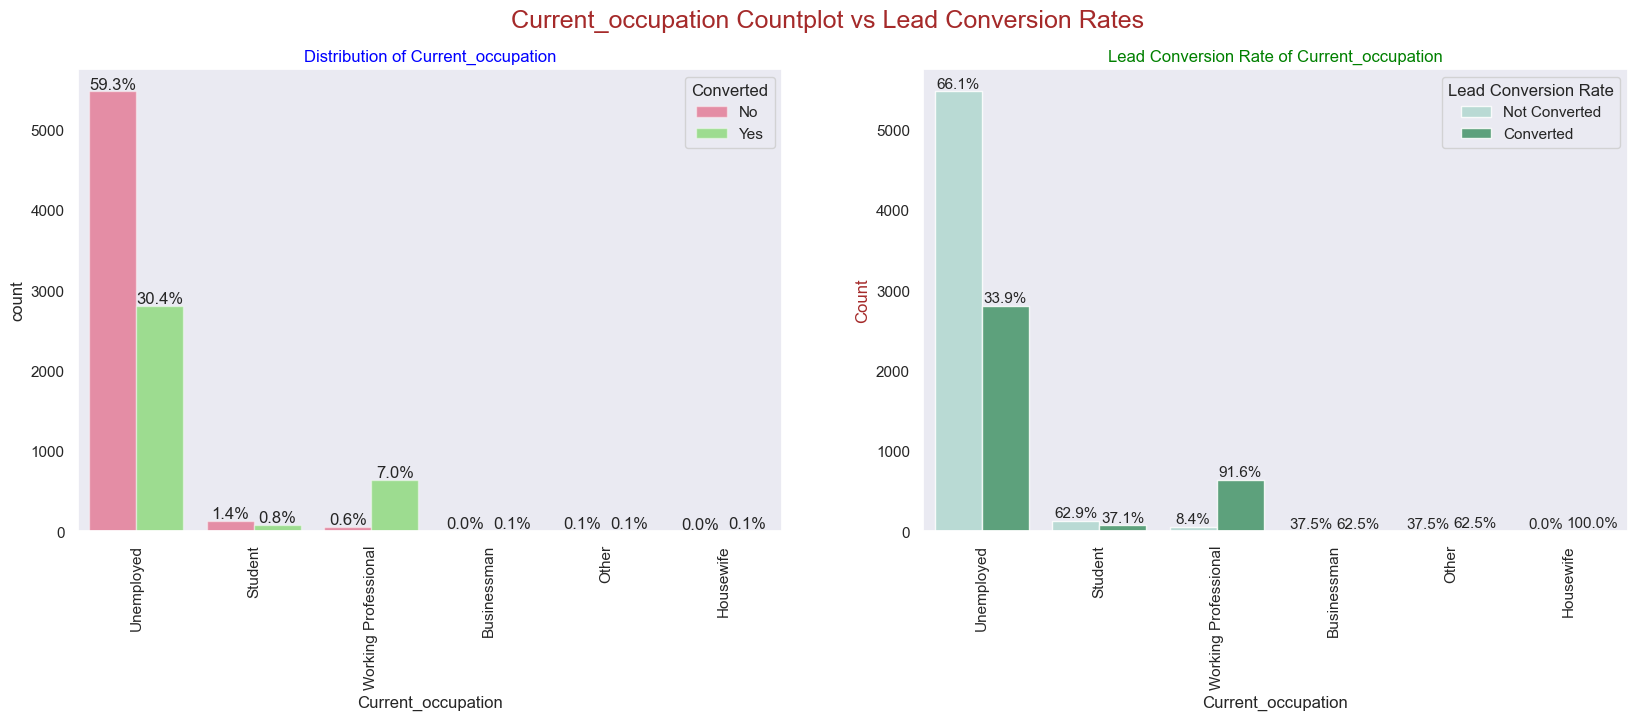

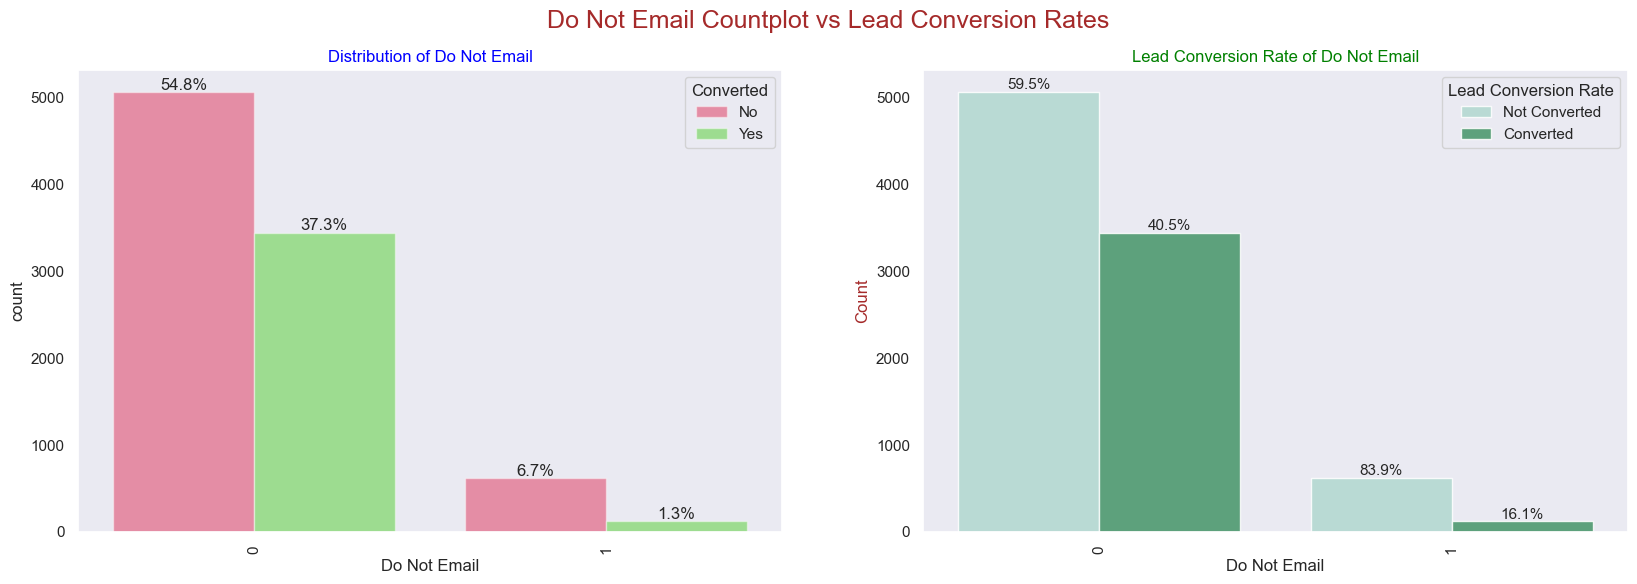

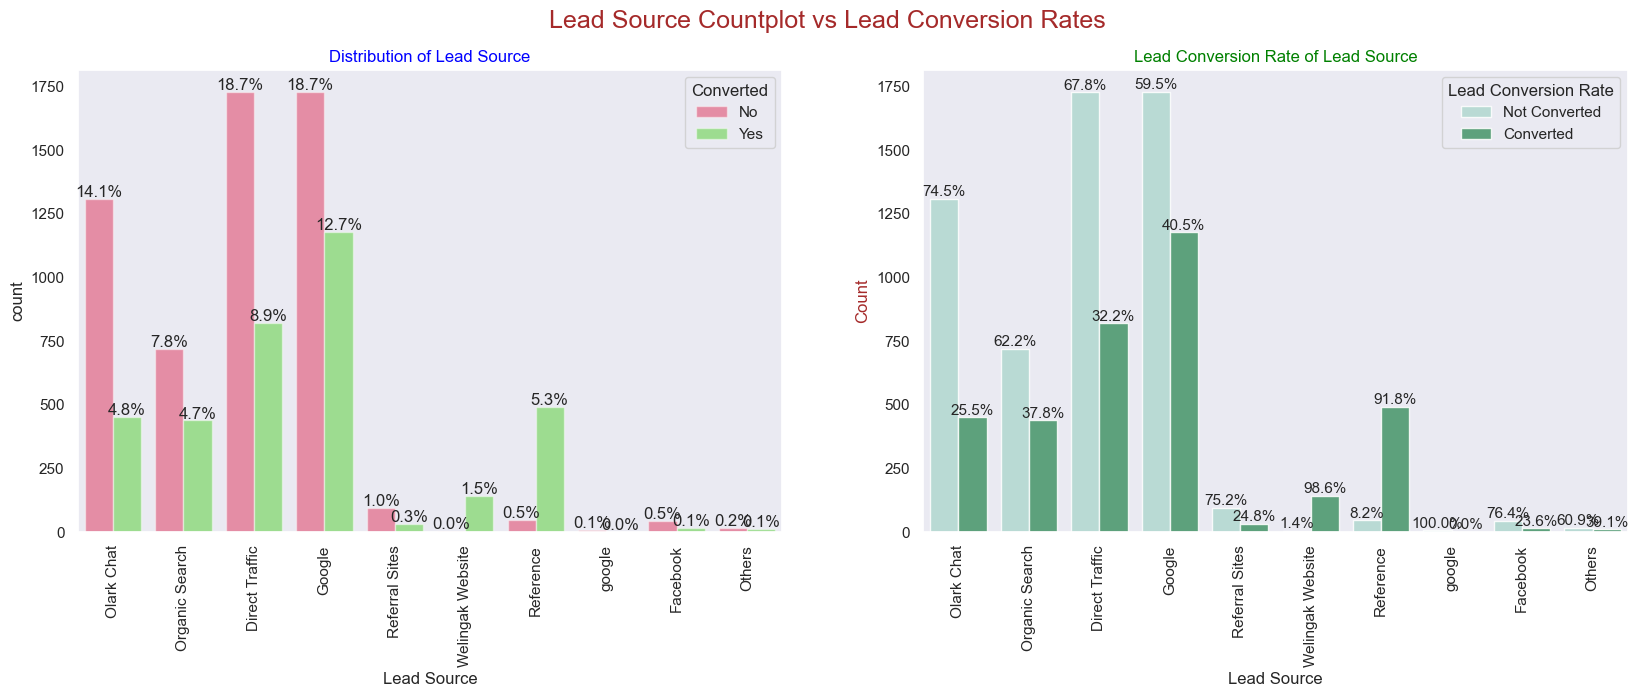

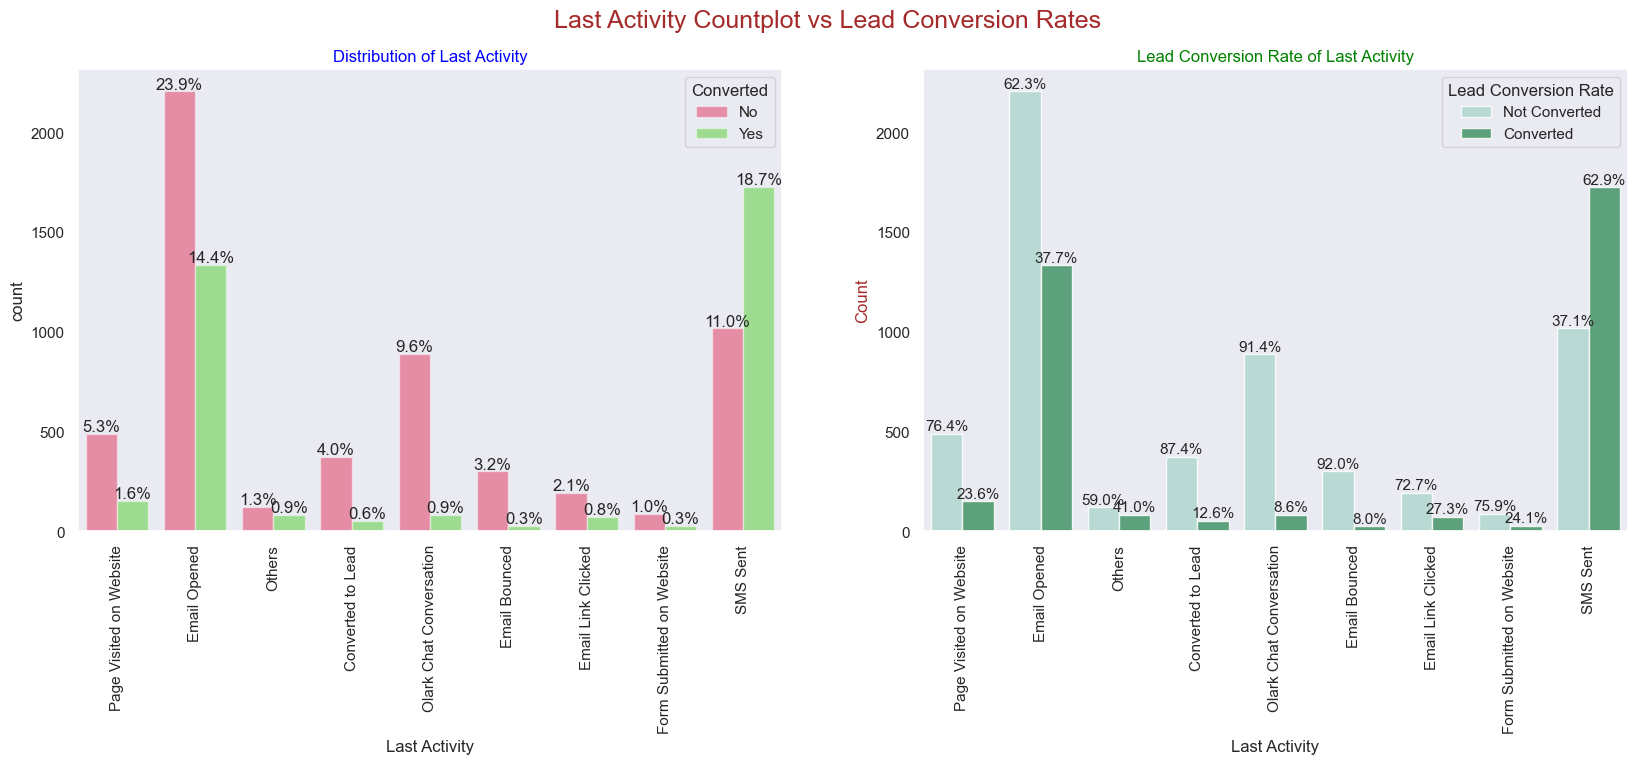

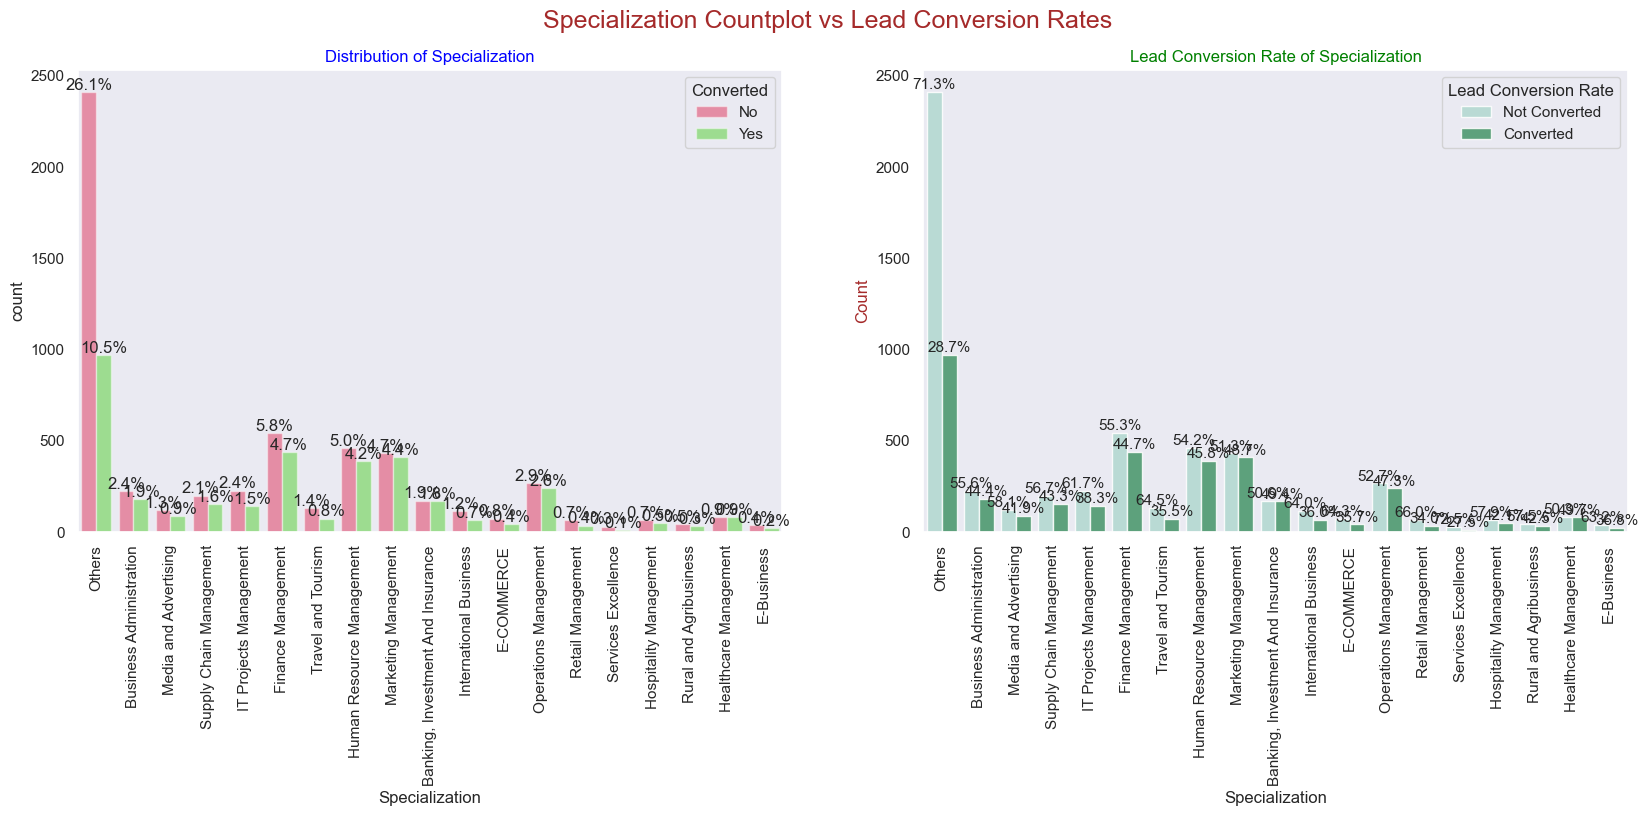

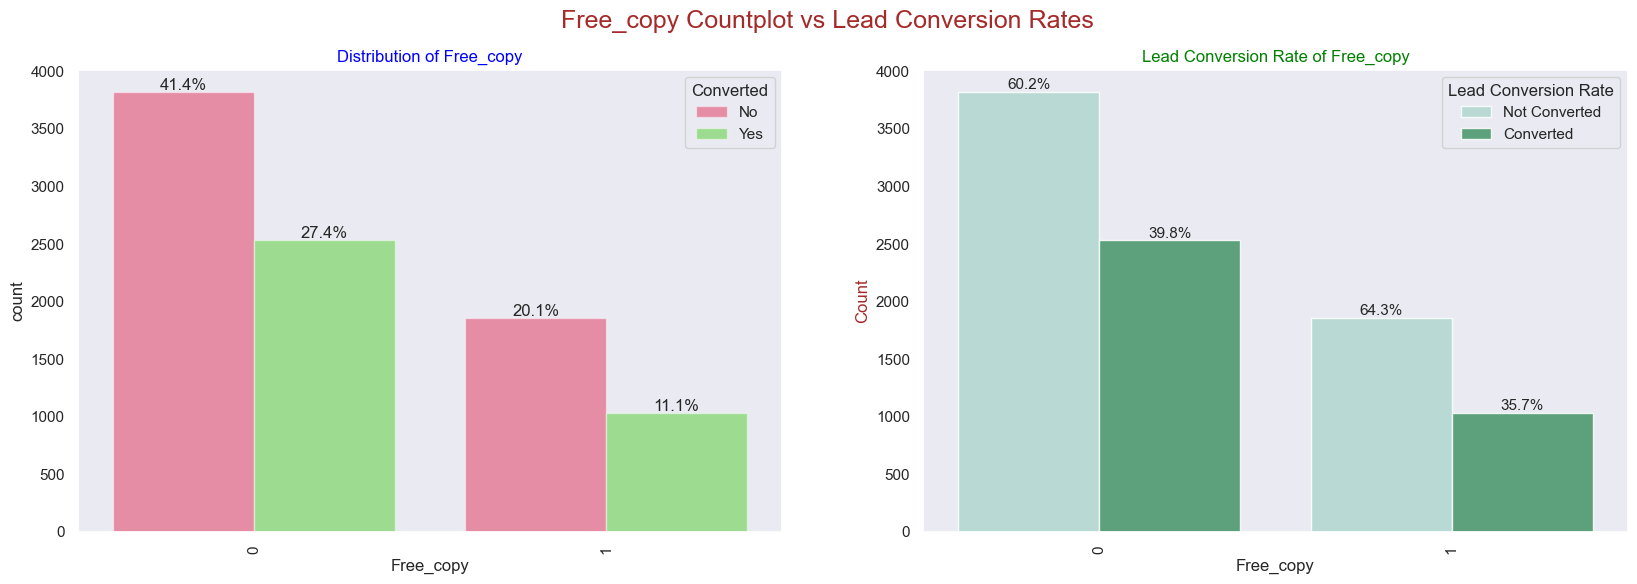

In [ ]:
# The UDF "Bivariate catergoical columns" compares the actual distribution (value_count %) from the data with the lead conversion rate (i.e., how many leads are converted from the first plot distribution) shown in the second graph.

def categorical_columns_v2(df,variable_name,Target = "Converted"):
    plt.figure(figsize = (20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color = "Brown", fontsize = 18)
    plt.subplot(1,2,1) # 1st subplot
    plt.title("Distribution of {}".format(variable_name),color = "blue")
    ax=sns.countplot(x=variable_name,hue = Target,data = leads_scoring_df,palette = "prism_r",alpha = 0.46)
    total=len(leads_scoring_df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    for p in ax.patches: # Annotation for 1st plot
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    plt.subplot(1,2,2) # 2nd plot
    plt.title("Lead Conversion Rate of {}".format(variable_name), color = "green",fontsize = 12)
    ax = sns.countplot(x = variable_name,hue = Target, data = df, palette = "BuGn",alpha = 0.85)   #ax1 is for annotation
    plt.xticks(rotation = 90)
    plt.ylabel("Count",color = 'brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers] # Calculate percentage above bars in countplot (Conversion rate)
    for bars in ax.containers: # Annotation for 2nd plot
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

# Using a loop and a UDF, perform a bivariate analysis on each of these variables.
# Comparison of the variables with regard to the target variable, "Converted," using the category column "hue" as the target variable.
categorical_columns_2 = ["Lead Origin","Current_occupation","Do Not Email","Lead Source","Last Activity","Specialization","Free_copy"]

for i in categorical_columns_2:
    categorical_columns_v2(leads_scoring_df, variable_name=i)

## View Points:
    
<strong>Lead Origin:</strong> With a lead conversion rate of 36%, the "Landing Page Submission" generated almost 52% of all leads. Approximately 39% of clients were identified by the "API" with a 31% lead conversion rate.

<strong>Current_Occupation:</strong> With a lead conversion rate of 34%, around 90% of the clients are unemployed. Working professionals make up only 7.6% of all customers and have a lead conversion rate of over 92%.

<strong>Do Not Email:</strong> 92% of respondents have chosen not to receive emails regarding the course.

<strong>Lead Source:</strong> Google contributes 40% of the LCR from its 31% customers, Direct Traffic contributes 32% of the LCR from its 27% customers, Organic Search also contributes 37.8% of the LCR from its 12.5% customers, and Reference contributes 91% of the LCR from its only 6% of customers.

<strong>Last Activity:</strong> "SMS Sent" had a high lead conversion rate of 63% with a 30% contribution from previous activities; "Email Opened" had a 38% contribution from previous customer activities and a 37% lead conversion rate.

<strong>Specialisation:</strong> Marketing Management, Human Resources Management, and Financial Management contribute well.

<Figure size 1600x800 with 0 Axes>

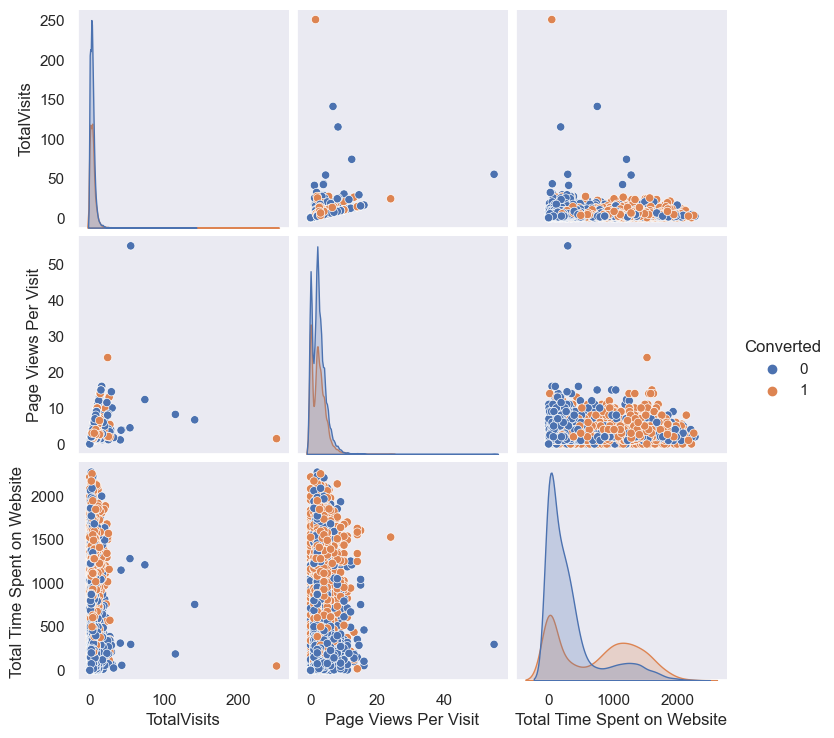

In [ ]:
# Pairplot the columns with numerical values
plt.figure(figsize = (16, 8))
sns.pairplot(data = leads_scoring_df, vars = numerical_columns, hue = "Converted")
plt.show()

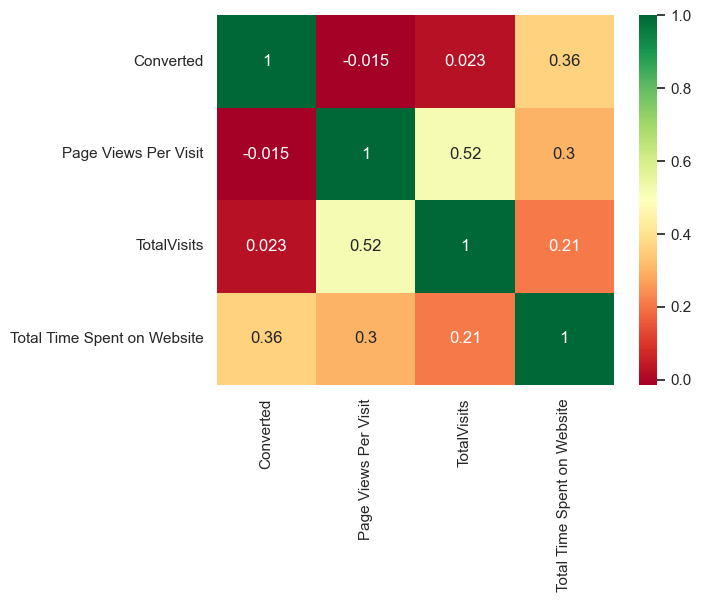

In [ ]:
# Plotting the numerical columns in heatmaps
numerical_columns = ["Converted",'Page Views Per Visit','TotalVisits','Total Time Spent on Website']
# Plotting in heatmaps
sns.heatmap(data = leads_scoring_df[numerical_columns].corr(), cmap="RdYlGn", annot=True)
plt.show()

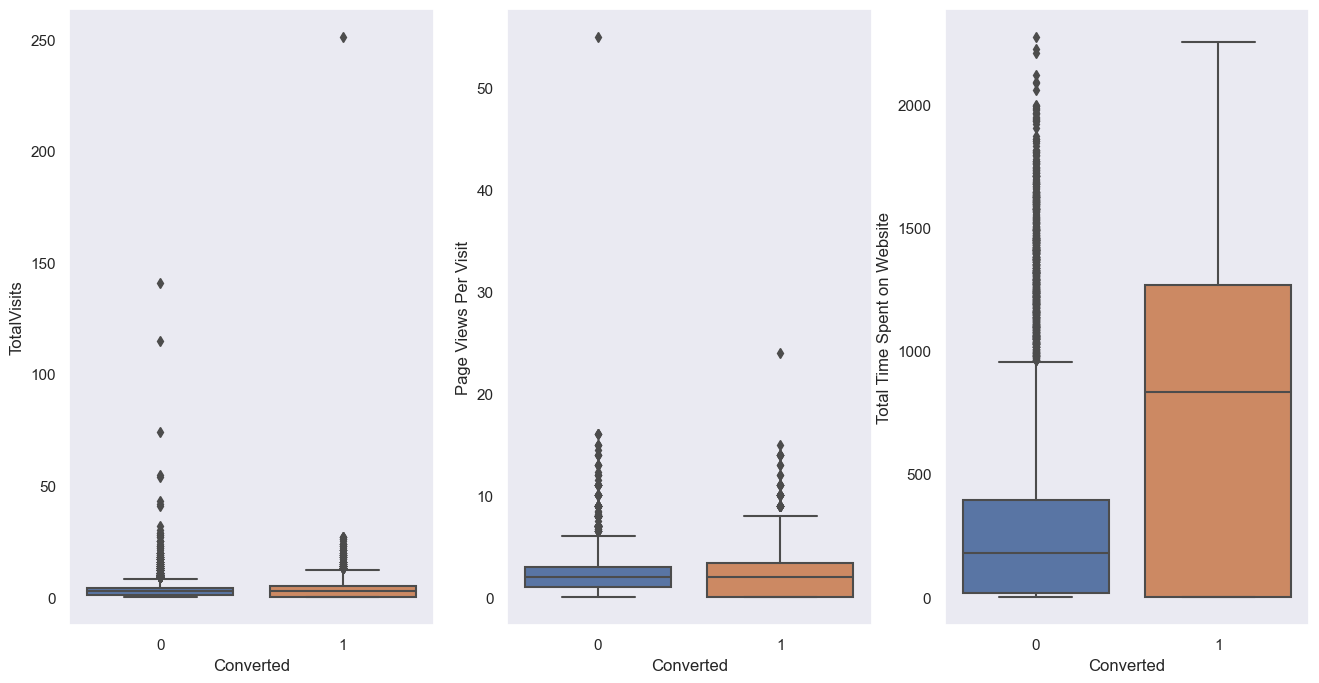

In [ ]:
# Boxplot the Converted numerical columns with hue
plt.figure(figsize=(16, 8))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_scoring_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_scoring_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_scoring_df)
plt.show()

### According to this boxplots, previous leads who spend more time on the website convert more successfully than those who spend less time.

# Data Preparation

## Creation of Dummy Variables

In [ ]:
# Introducing a dummy variable for some of the categorical variables and remove the first one
dummy_variables = pd.get_dummies(leads_scoring_df[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Include the result into the main dataframe
leads_df = pd.concat([leads_scoring_df, dummy_variables], axis=1)

# Checking the dataframe after including the outcomes
leads_scoring_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  \
0  Page Visited on Website                   Others         Unemployed   
1             Email Opened                   Others         Unemployed   
2             Email Opened  Business Administration            Student   
3                   Others    Media and Advertising         Unemployed   
4        Converted to Lead                   Others         Unemployed   

   Free_copy  
0          0  
1          0  
2          1  
3          0  
4          0

In [ ]:
# Introducing a dummy variable for some of the categorical variables and remove the first one
dummy = pd.get_dummies(leads_scoring_df[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)
leads_scoring_df = pd.concat([leads_scoring_df,dummy],1)

In [ ]:
leads_scoring_df.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization Current_occupation  ...  \
0  Page Visited on Website                   Others         Unemployed  ...   
1             Email Opened                   Others         Unemployed  ...   
2             Email Opened  Business Administration            Student  ...   
3                   Others    Media and Advertising         Unemployed  ...   
4        Converted to Lead                   Others         Unemployed  ...   

   Specialization_Retail Management  Specialization_Rural and Agribusiness  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Specialization_Services Excellence  Specialization_Supply Chain Management  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   

   Specialization_Travel and Tourism  Current_occupation_Housewife  \
0                                  0                             0   
1                                  0                             0   
2                                  0                             0   
3                                  0                             0   
4                                  0                             0   

   Current_occupation_Other  Current_occupation_Student  \
0                         0                           0   
1                         0                           0   
2                         0                           1   
3                         0                           0   
4                         0                           0   

   Current_occupation_Unemployed  Current_occupation_Working Professional  
0                              1                                        0  
1                              1                                        0  
2                              0                                        0  
3                              1                                        0  
4                              1                                        0  

[5 rows x 55 columns]

In [ ]:
# We have created dummies for the below variables, so we can drop them
leads_scoring_df = leads_scoring_df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],1)

In [ ]:
# Checking the shape of df after dropping the above columns
leads_scoring_df.shape

(9240, 50)

In [ ]:
leads_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

# Test-Train Split

In [ ]:
# X in the context of predictor variables
X = leads_scoring_df.drop('Converted', axis = 1)

# Target variables are set to y
y = leads_scoring_df["Converted"]

# Splitting the data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [ ]:
# Train_dataset
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 49) 
y_train: (6468,)


In [ ]:
# Test_dataset
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 49) 
y_test: (2772,)


# Feature Scaling

In [ ]:
# using standard scaler for scaling the features
scaler = StandardScaler()

# obtaining the dataframe int64 and float64 datatype columns for scaling
numerical_columns = X_train.select_dtypes(include = ['int64','float64']).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [ ]:
# Dataframe for X-train after scaling
X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1871     -0.291638    -0.645678                    -0.885371   
6795     -0.291638     0.109111                     0.005716   
3516     -0.291638     0.297808                    -0.691418   
8105     -0.291638     0.297808                     1.365219   
3934     -0.291638    -0.645678                    -0.885371   

      Page Views Per Visit  Free_copy  Lead Origin_Landing Page Submission  \
1871             -1.062143  -0.673169                                    0   
6795             -0.452487   1.485511                                    1   
3516              0.083827  -0.673169                                    0   
8105              1.229797  -0.673169                                    1   
3934             -1.062143  -0.673169                                    0   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
1871                          0                        0   
6795                          0                        0   
3516                          0                        0   
8105                          0                        0   
3934                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Facebook  ...  \
1871                           0                     0  ...   
6795                           0                     0  ...   
3516                           0                     0  ...   
8105                           0                     0  ...   
3934                           0                     0  ...   

      Specialization_Retail Management  Specialization_Rural and Agribusiness  \
1871                                 0                                      0   
6795                                 0                                      0   
3516                                 0                                      0   
8105                                 0                                      0   
3934                                 0                                      0   

      Specialization_Services Excellence  \
1871                                   0   
6795                                   0   
3516                                   0   
8105                                   1   
3934                                   0   

      Specialization_Supply Chain Management  \
1871                                       0   
6795                                       0   
3516                                       0   
8105                                       0   
3934                                       0   

      Specialization_Travel and Tourism  Current_occupation_Housewife  \
1871                                  0                             0   
6795                                  0                             0   
3516                                  0                             0   
8105                                  0                             0   
3934                                  0                             0   

      Current_occupation_Other  Current_occupation_Student  \
1871                         0                           0   
6795                         0                           0   
3516                         0                           0   
8105                         0                           0   
3934                         0                           0   

      Current_occupation_Unemployed  Current_occupation_Working Professional  
1871                              1                                        0  
6795                              1                                        0  
3516                              1                                        0  
8105                              1                                        0  
3934                              1                                        0  

[5 rows x 49 columns]

In [ ]:
# Analysing the Lead Conversion Rate - "Converted" is our Goal Variable
Lead_Conversion_Rate = (sum(leads_scoring_df['Converted'])/len(leads_scoring_df['Converted'].index))*100
Lead_Conversion_Rate
print("We have Conversion Rate of", Lead_Conversion_Rate)

We have Conversion Rate of 38.53896103896104


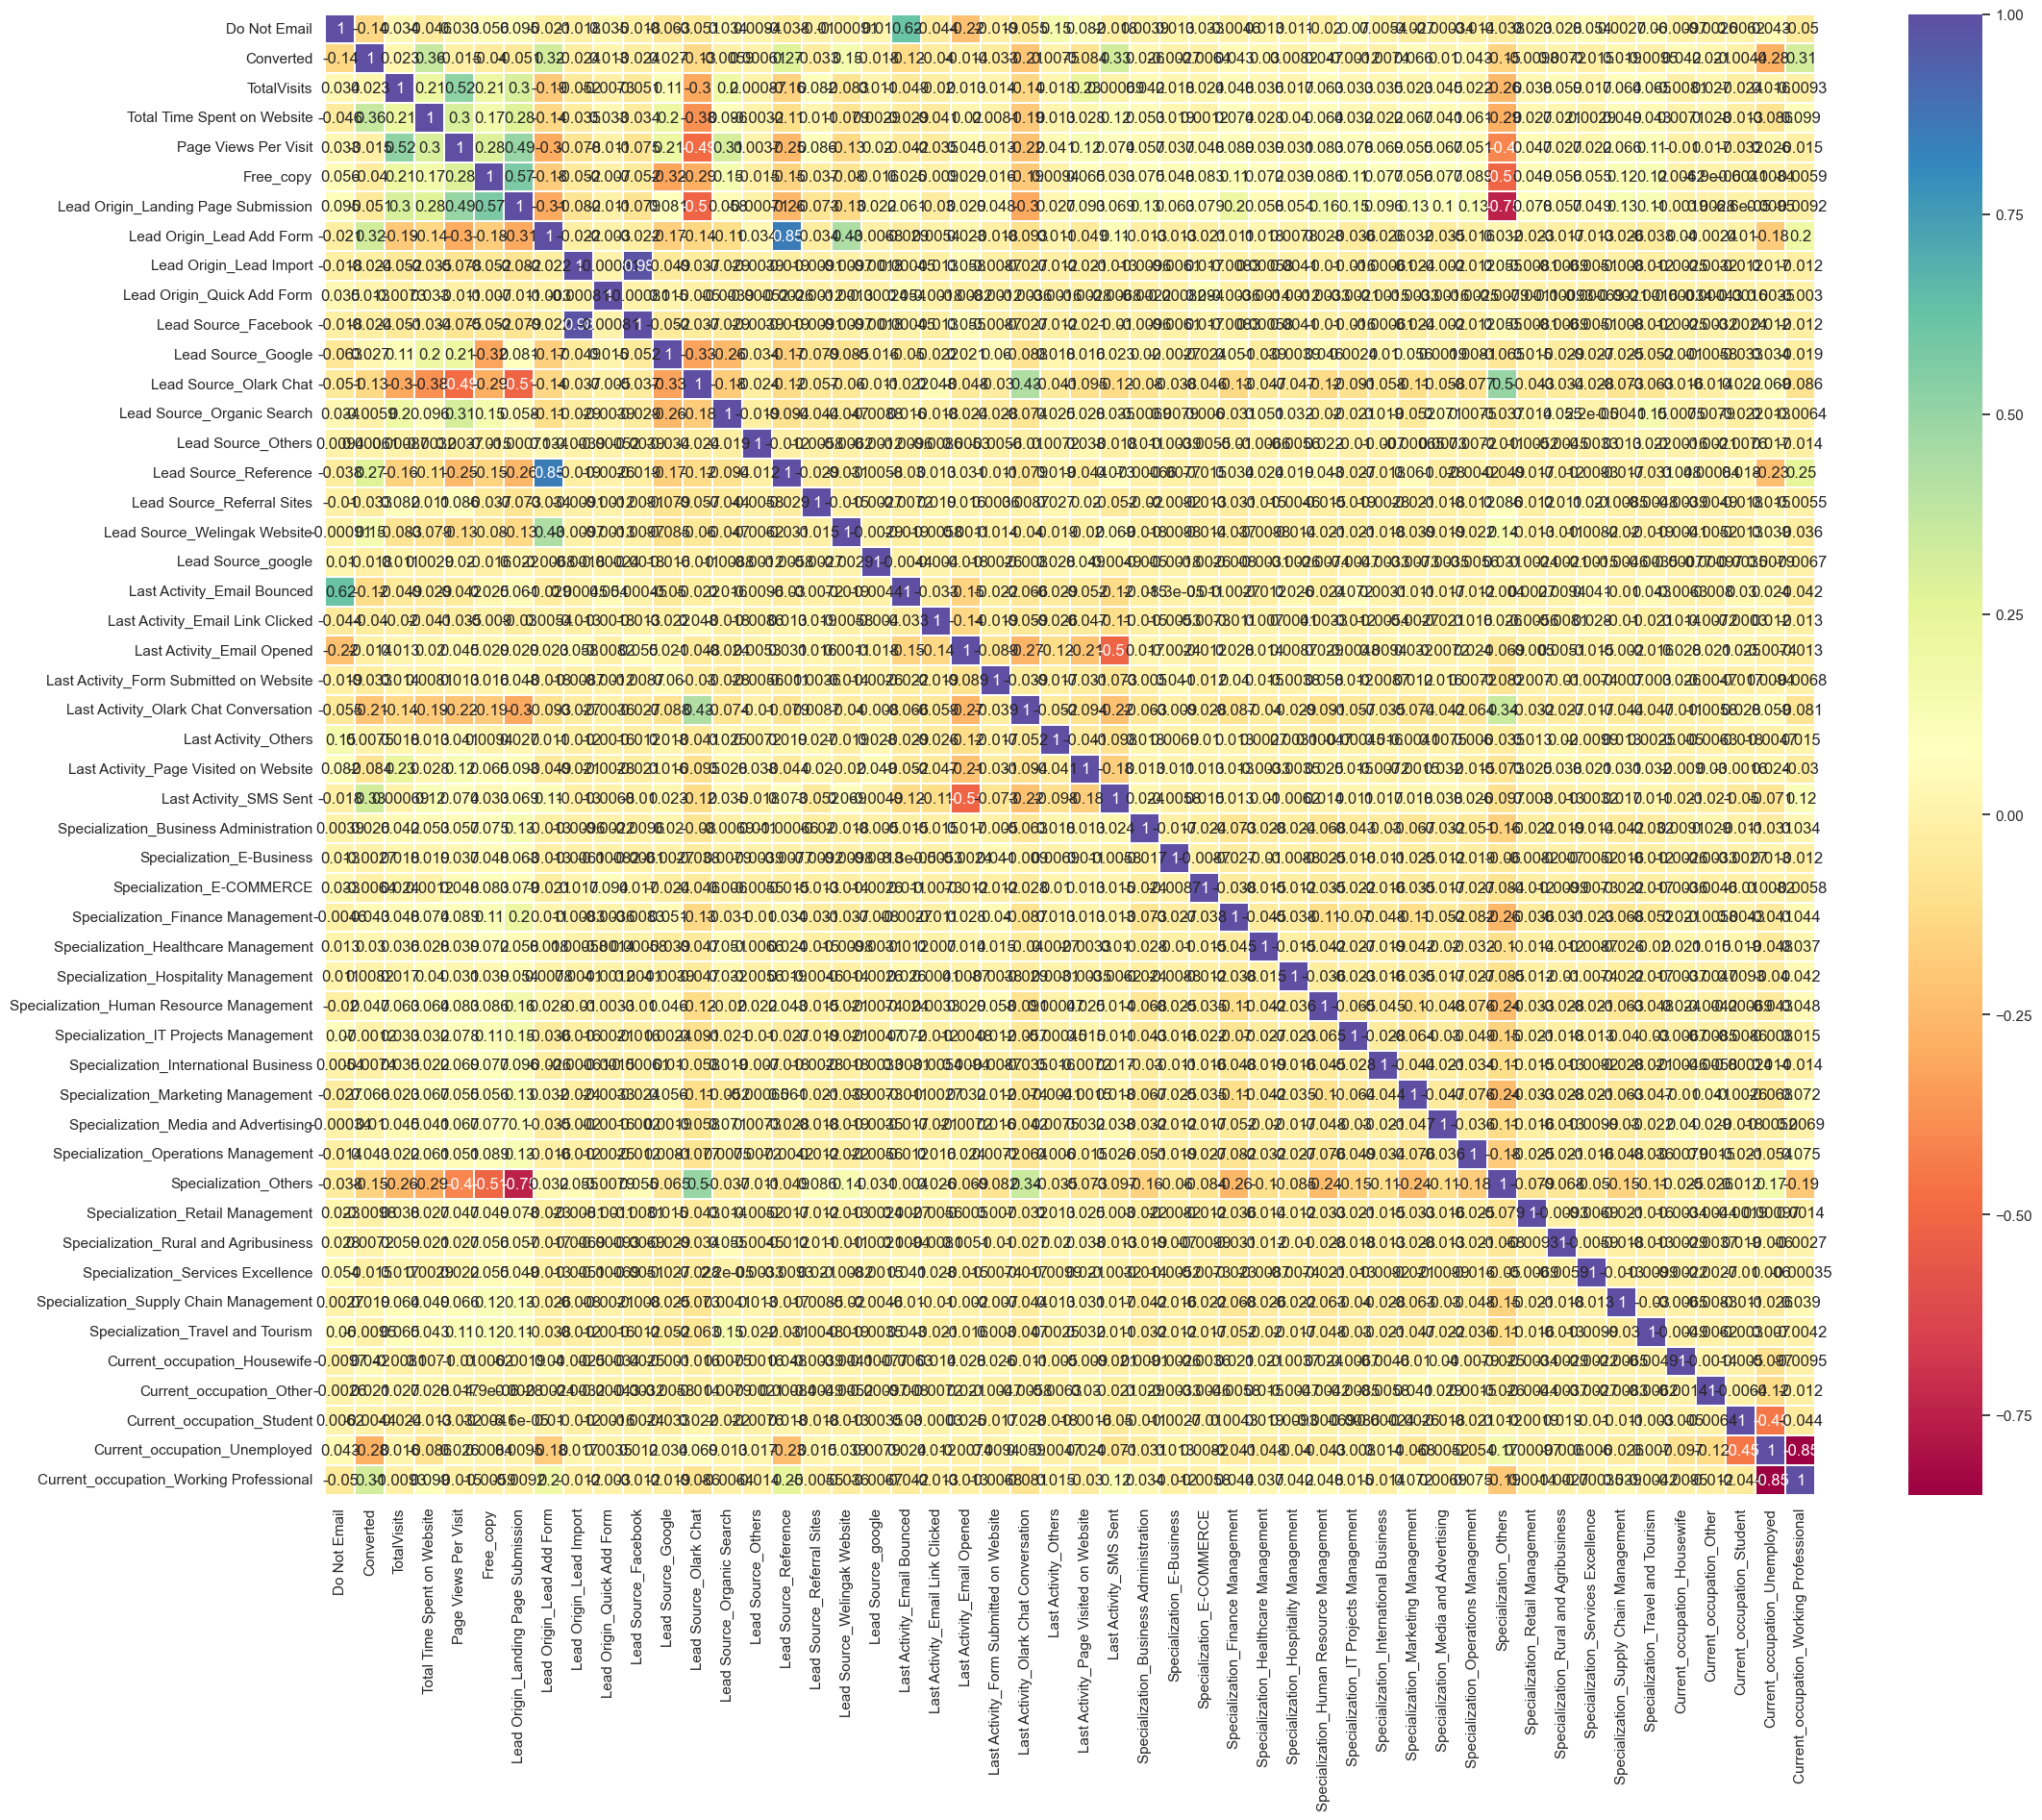

In [ ]:
# Correlation matrix analysis
plt.figure(figsize = (25,20))
sns.heatmap(leads_scoring_df.corr(), linewidths = 0.1, cmap = "Spectral",annot = True)
plt.show()

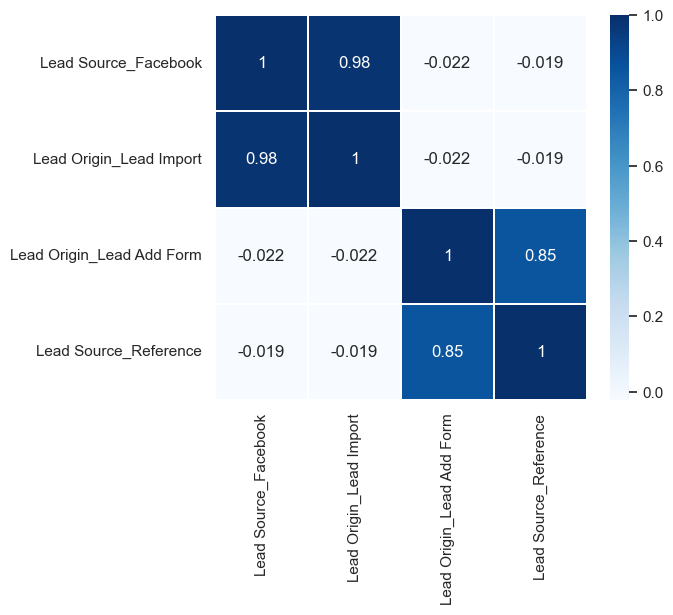

In [ ]:
# As there are so many columns in the heatmap above, it makes sense to break down any variables that may be strongly connected with one another.
# Analysing variables that may be highly correlated with one another from the same class in the heatmap above.
plt.figure(figsize = (6,5))
sns.heatmap(leads_scoring_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

### It is preferable to exclude one of these variables from each pair because they don't provide much value to the model and have very high correlations (0.98 and 0.85) with one another. So, because we have the option to remove either of them, let's remove "Lead Origin_Lead Import" and "Lead Origin_Lead Add Form."

In [ ]:
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], 1)
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'], 1)

# Model Building

In [ ]:
# Building a logistic regression model will help us forecast categorical variables. Feature Choice Using p-values and VIFs to manually fine-tune using RFE (coarse tuning)
# Let's reduce the variables using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)
# looking into the RFE's output
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 14),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 15),
 ('Free_copy', False, 22),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 21),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 24),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 8),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 26),
 ('Last Activity_Olark Chat Conversation', False, 10),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Specializati

In [ ]:
# Check out RFE's top 15 features.
top15 = pd.DataFrame()
top15['features'] = X_train.columns
top15['Feature Chosen'] = rfe.support_
top15['Ranking'] = rfe.ranking_
top15.sort_values(by = 'Ranking')

features  Feature Chosen  Ranking
23                    Last Activity_SMS Sent            True        1
42              Current_occupation_Housewife            True        1
36                     Specialization_Others            True        1
29     Specialization_Hospitality Management            True        1
22     Last Activity_Page Visited on Website            True        1
21                      Last Activity_Others            True        1
18                Last Activity_Email Opened            True        1
17          Last Activity_Email Link Clicked            True        1
14              Lead Source_Welingak Website            True        1
12                     Lead Source_Reference            True        1
11                        Lead Source_Others            True        1
46   Current_occupation_Working Professional            True        1
9                     Lead Source_Olark Chat            True        1
2                Total Time Spent on Website            True        1
5        Lead Origin_Landing Page Submission            True        1
7                       Lead Source_Facebook           False        2
45             Current_occupation_Unemployed           False        3
43                  Current_occupation_Other           False        4
44                Current_occupation_Student           False        5
38     Specialization_Rural and Agribusiness           False        6
32     Specialization_International Business           False        7
15                        Lead Source_google           False        8
37          Specialization_Retail Management           False        9
20     Last Activity_Olark Chat Conversation           False       10
0                               Do Not Email           False       11
8                         Lead Source_Google           False       12
16               Last Activity_Email Bounced           False       13
1                                TotalVisits           False       14
3                       Page Views Per Visit           False       15
24    Specialization_Business Administration           False       16
35      Specialization_Operations Management           False       17
33       Specialization_Marketing Management           False       18
30  Specialization_Human Resource Management           False       19
40    Specialization_Supply Chain Management           False       20
6                 Lead Origin_Quick Add Form           False       21
4                                  Free_copy           False       22
26                 Specialization_E-COMMERCE           False       23
10                Lead Source_Organic Search           False       24
31     Specialization_IT Projects Management           False       25
19   Last Activity_Form Submitted on Website           False       26
28      Specialization_Healthcare Management           False       27
27         Specialization_Finance Management           False       28
39        Specialization_Services Excellence           False       29
13                Lead Source_Referral Sites           False       30
41         Specialization_Travel and Tourism           False       31
34      Specialization_Media and Advertising           False       32
25                 Specialization_E-Business           False       33

In [ ]:
# columns that chosen using RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Current_occupation_Housewife',
       'Current_occupation_Working Professional'],
      dtype='object')

In [ ]:
# columns that not choose using RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit', 'Free_copy',
       'Lead Origin_Quick Add Form', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_google',
       'Last Activity_Email Bounced',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Ex

In [ ]:
# VIFs for variables can be calculated using a user-defined function
def find_the_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

## Buliding Model #1

In [ ]:
# For the detailed statistics, build a model using statsmodels
# columns chosen by RFE for this model's use
rfe_col=X_train.columns[rfe.support_]

# creating the X_train dataframe using the RFE-selected variables
X_train_rfe = X_train[rfe_col]

# a constant variable is added
X_train_sm1 = sm.add_constant(X_train_rfe)

# establish a fitted model
logreg1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()

logreg1.params

const                                      -1.546983
Total Time Spent on Website                 1.053574
Lead Origin_Landing Page Submission        -1.256917
Lead Source_Olark Chat                      0.892443
Lead Source_Others                          0.937277
Lead Source_Reference                       2.898488
Lead Source_Welingak Website                5.359796
Last Activity_Email Link Clicked            0.883653
Last Activity_Email Opened                  1.449137
Last Activity_Others                        1.760354
Last Activity_Page Visited on Website       0.800669
Last Activity_SMS Sent                      2.568670
Specialization_Hospitality Management      -1.051274
Specialization_Others                      -1.189206
Current_occupation_Housewife               23.152156
Current_occupation_Working Professional     2.708609
dtype: float64

In [ ]:
# Summary of logistic regression model 1
print(logreg1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.9
Date:                Tue, 19 Sep 2023   Deviance:                       5449.8
Time:                        19:44:32   Pearson chi2:                 8.14e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3854
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### <strong>p-value</strong> of Current_occupation_Housewife is high, so we can drop it. This exceeds the 0.05 recognised cutoff for statistical significance.

## Buliding Model #2

In [ ]:
# Removing the column "Current_occupation_Housewife"
rfe_col = rfe_col.drop("Current_occupation_Housewife")

In [ ]:
# columns chosen by RFE for this model's use
X_train_rfe = X_train[rfe_col]

# a constant variable is added
X_train_sm2 = sm.add_constant(X_train_rfe)

# establish a fitted model
logreg2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()

logreg2.params

const                                     -1.534971
Total Time Spent on Website                1.052433
Lead Origin_Landing Page Submission       -1.251393
Lead Source_Olark Chat                     0.890119
Lead Source_Others                         0.931320
Lead Source_Reference                      2.915551
Lead Source_Welingak Website               5.358981
Last Activity_Email Link Clicked           0.881206
Last Activity_Email Opened                 1.443589
Last Activity_Others                       1.746343
Last Activity_Page Visited on Website      0.786855
Last Activity_SMS Sent                     2.554636
Specialization_Hospitality Management     -1.058816
Specialization_Others                     -1.193212
Current_occupation_Working Professional    2.700119
dtype: float64

In [ ]:
# Summary of logistic regression model 2
print(logreg2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 19 Sep 2023   Deviance:                       5465.6
Time:                        19:44:33   Pearson chi2:                 8.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3839
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

#### "Lead Source_Facebook" column has a high p-value of 0.187, which is greater than the standard level of 0.05 for statistical significance, it will be removed from the model.

## Buliding Model #3

In [ ]:
# Removing the column "Lead Source_Facebook"
rfe_col = rfe_col.drop("Lead Source_Facebook")

KeyError: "['Lead Source_Facebook'] not found in axis"

In [ ]:
# columns chosen by RFE for this model's use
X_train_rfe = X_train[rfe_col]

# a constant variable is added
X_train_sm3 = sm.add_constant(X_train_rfe)

# establish a fitted model
logreg3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()

logreg3.params

In [ ]:
# Summary of logistic regression model 3
print(logreg3.summary())

#### Due to a high p-value of 0.070, which is over the standard cutoff point of 0.05 for statistical significance, the "Lead Source_Others" column will be eliminated from the model.

## Buliding Model #4

In [ ]:
# Removing the column "Lead Source_Others"
rfe_col = rfe_col.drop("Lead Source_Others")

In [ ]:
# columns chosen by RFE for this model's use
X_train_rfe = X_train[rfe_col]

# a constant variable is added
X_train_sm4 = sm.add_constant(X_train_rfe)

# establish a fitted model
logreg4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()

logreg4.params

In [ ]:
# Summary of logistic regression model 4
print(logreg4.summary())

### We will utilise Model 4 for future investigation because it is reliable and has significant p-values that are lower than the cutoff (p-values 0.05).

### Let's now examine VIFs for these variables to see if any multicollinearity between the independent variables exists.

In [ ]:
# Checking the VIFs for each variable in the 4th Model
find_the_vif(X_train_rfe)

### All variables have good VIF values under 5, so none need to be eliminated.

### All variables' p-values are less than 0.05.

### The p-values and VIFs are both within acceptable limits, hence this model appears to be valid.

### We shall therefore complete Model 4 for Model Evaluation.

# Model Evaluation

In [ ]:
# Obtaining the predicted values on the train set
y_train_pred = logreg4.predict(X_train_sm4)
y_train_pred[:10]

In [ ]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

In [ ]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

In [ ]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

## Confusion Matrix

In [ ]:
# Confusion matrix  (Actual / predicted)
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

## Accuracy

In [ ]:
accuracy = metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print("Accuracy of the Model", accuracy)

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

# Check out logistic regression model's sensitivity.
print("Sensitivity :", TP / float(TP+FN))

In [ ]:
# Find out the model's specificity
print("Specificity :", TN / float(TN+FP))

In [ ]:
# Predicting a customer's conversion while the client hasn't really converted.
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value
Positive_predictive_value = TP / float(TP+FP)
print("Positive predictive value :", Positive_predictive_value)

In [ ]:
# Negative predictive value
Negative_predictive_value = TN / float(TN+ FN)
print("Negative predictive value :", Negative_predictive_value)

## Plotting the ROC Curve

In [ ]:
# UDF to draw ROC curve
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize = (5, 5))
    plt.plot( fpr, tpr, label = 'ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc = "lower right")
    plt.show()
    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False)

# Draw ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

### Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

## Finding Optimal Cutoff Point/ Probability

In [ ]:
# Let's make columns with various cutoffs for likelihood
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
# Let's now determine the accuracy sensitivity and specificity for different probability cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    sensitivity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    specificity = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [ i, accuracy, sensitivity, specificity]
print(cutoff_df)

In [ ]:
# Plotting sensitivity and specificity for various probability will demonstrate accuracy
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
# Finding the sensitivity and accuracy curves intersection points
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensitivity'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)
# Locate the spots where the curves for specificity and accuracy overlap
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['specificity'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)
# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2
# Calculate the intersection point's precision, sensitivity, and accuracy using interpolation
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)
# Plot the three curves, then add horizontal and vertical lines at the intersection
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')
# Coordinates of the (x,y) intersection point should be annotated
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)
plt.show()

### The approximate point where all of the curves converge is 0.347, making this the ideal cutoff value for the probability threshold. Let's do the mapping using the optimal cutoff point.

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)
# Removing the dataframe's unnecessary columns
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"], axis = 1, inplace = True)
y_train_pred_final.head()

## Using the confusion matrix to calculate all metrics for Train

In [ ]:
# Calculate the overall accuracy
overall_accuracy = metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"])
print("Overall accuracy of the model :", overall_accuracy)

In [ ]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(FP + TN)
    FNR = FN/(FN +TP)
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP)
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [ ]:
# Confusion metrics for the df 'y_train_pred_final'
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("__"*50,"\n")
print("Confusion Matrix")
print(confusion_matrix)
print("__"*50,"\n")
# Using UDF to compute all logistic regression metrics
logreg_all_metrics(confusion_matrix)
print("__"*50,"\n")

## Precision and recall tradeoff

### Comparing all indicators from the Precision-Recall and Specificity-Sensivity views will help us determine a better probability threshold for increasing the conversion rate to the CEO's asked 80%.

In [ ]:
# Creating precision-recall tradeoff curve
y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")
# add legend and axis labels
plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.show()

### The threshold value at which the model achieves a balance between recall and precision is where the curve intersects. It can be used to optimise the model's performance based on business requirements; in this case, our probability threshold is around 0.41 from the curve above.

In [ ]:
# Evaluation of the test model using a copy of the df with a precision recall threshold of 0.41
y_train_precision_recall = y_train_pred_final.copy()
# Determining which view (sensi-specific or precision-recall) is superior by assigning a feature for a 0.41 cutoff from the precision recall curve
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

In [ ]:
# Let's compare the 0.347 cutoff from the sensistivity-specificity view to the 0.41 cutoff for all matrices in the precision-recall view.
# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("_"*50,)
print("Confusion Matrix")
print(confusion_matrix)
print("_"*50,"\n")
# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)
print("_"*50,"\n")

### As we can see from the metrics above, when we applied a precision-recall threshold cut-off of 0.41, the True Positive Rate, Sensitivity, and Recall values decreased to about 75%, but our business objective calls for them to be close to 80%.

### With a sensitivity-specificity cut-off level of 0.345, we are collecting measurements with an average of 80%. Therefore, for our optimal cut-off for final predictions, we will use the sensitivity-specificity view.

## Lead Score Feature Addition to the Training Dataframe
An increased score indicates that the lead is hot, or highly probable to convert.
A lower score, however, would indicate that the lead is uninteresting and unlikely to be converted.

In [ ]:
# Adding Lead Score feature
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

# Making Predictions with test dataset

In [ ]:
X_test.info()

In [ ]:
# Obtaining the dataframe's int64 and float64 datatype columns for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns
# scaling the columns
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test = X_test[rfe_col]
X_test.head()

## Prediction on Test Dataset using final model

In [ ]:
# a constant value is added
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

In [ ]:
# Using the final model, model 4, to make a forecast
y_test_pred = logreg4.predict(X_test_sm)

In [ ]:
# top 10 columns
y_test_pred[:10]

In [ ]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
# Add Prospect ID to the index
y_test_df['Prospect ID'] = y_test_df.index
# Removing the index from both dataframes in order to add them together
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# y_test_df and y_test_pred are appended
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

In [ ]:
# Rename the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
# Rearrange the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

In [ ]:
# 0.347 probability cutoff sensitivity-specificity approach during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

In [ ]:
# Draw ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )
draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

# View Points:

A good prediction model is shown by an area under the ROC curve of 0.87 out of 1, which is noted.

The next stage would be to assess the predictive model's effectiveness on a test set after the final predictions have been produced.
We will calculate several performance metrics, such as accuracy, precision, recall, etc., by contrasting the predicted labels (final_predicted) with the actual labels (Converted), respectively.

In [ ]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("__"*50,"\n")
print("Confusion Matrix")
print(confusion_matrix,"\n")
print("__"*50,"\n")
# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)
print("__"*50)

In [ ]:
# features and their coefficicent from final model
parameters = logreg4.params.sort_values(ascending=False)
parameters

### When a variable has a high positive coefficient, it means that it has a greater impact on forecasting the likelihood that leads will enrol in an X-Education course.

## Incorporating Lead Score in the Test Dataframe
An increased score indicates that the lead is hot, or highly probable to convert.
A lower score, however, would indicate that the lead is uninteresting and unlikely to be converted.

In [ ]:
# Adding the Lead Score
y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

## Customer Lead Score: Customers are given a customer lead score.

Customers with higher lead scores have a better probability of converting.
Customers with lower lead scores have a decreased chance of converting.

# Final Findings:
<strong>Train Data Set:</strong>

Precision: 80.57%

80.41% sensitivity

Particularity: 80.66%


<strong>Test Data Set:</strong>

80.41% accuracy

79.82% sensitivity

Particularity: 80.80%


The model is performing consistently across numerous evaluation criteria in both the test and train datasets, as shown by the evaluation matrices' proximity to one another.

Using a cut-off value of 0.347, the model attained a sensitivity of 80.05% in the train set and 79.82% in the test set.
Sensitivity here refers to the proportion of leads that the model correctly predicts among all possible leads that convert.
A target sensitivity of about 80% had been established by the CEO of X Education.
Additionally, the model's accuracy, which was 80.46%, met the goals of the study.